In [ ]:
##<script>
##  jQuery(document).ready(function($) {  
##  
##  $(window).on('load', function(){
##    $('#preloader').fadeOut('slow',function(){$(this).remove();});
##  });
##  
##  });
##</script>
##
##<style type="text/css">
##  div#preloader { position: fixed; 
##      left: 0; 
##      top: 0; 
##      z-index: 999; 
##      width: 100%; 
##      height: 100%; 
##      overflow: visible; 
##      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center; 
##  }
##
##</style>
##
##<div id="preloader">
##
##</div>

# Food Framing Analysis Script (2018). Polished display Version

#### Adapted from (Folke et al., 2016, NHB) by Pradyumna Sepulveda, Amy Benson and Benedetto de Martino

# Contents

# Data Analysis
## [0. Load Data](#load)
## [1. Correlation Graphs](#corr)
## [2. Logistic Plots](#log)
### [2.1. Logistic plots value](#logisticVal)
### [2.2. Logisitc plots familiarity](#logisticFam)
## [3. Regression Analysis](#reg)
### [3.1. Regressions per Condition](#regCond)
### [3.2. Regression per Participant](#regPart)
### [3.3. Regression including Familiarity](#regressionsFam)
#### [3.3.1 Choice](#ChoiceregressionFam)
#### [3.3.2 Confidence](#ConfregressionFam)
#### [3.3.3. Value + Familiarity](#VplusFregressionFam)
#### [3.3.4. Choice factors depending on familiarity](#ChoicFactregressionFam)
#### [3.3.5 BdM Familiarity-Value requested](#RequestregressionFam)
### [3.4. Hierarchical Regression (Pending)]()
# Appendix
## [1. Importing packages](#ImpPkg)
## [2. Loading Functions](#LoadFunc)




<a id='load'></a>
# 0. Load data and excluding participants

Participants 6, 33, 7, 17, 25, 30 should be excluded.Additionally, it was checked that trials in which participants did not fixate in any of the items were were skipped already. Therefore, 7 participants have been excluded.
Total number subjects = 40
Number of subjects remaining = =33

In [206]:
# Load data all participants
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/gitDocs/FF2018/Output/DataFoodFramingNotebook_v1.csv') 
#data_exp1 = pd.read_csv('/Users/bdmlab/Documents/GiTs/FF2018/Output/DataFoodFramingNotebook_v1.csv') 

for i in [6, 7, 17, 25, 30, 33]:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 37 38 39]
Number of participants: 33


In [208]:
data_exp1=data_exp1.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})
data_exp1

Unnamed: 0  Part  TrialN  PairID                                 LItem  \
0              0     1       1      14                116_boots_caramels.png   
1              1     1       2      44          102_propercorn_worcester.png   
2              2     1       3      51                       59_crunchie.png   
3              3     1       4      12               64_nestle_aero_mint.png   
4              4     1       5       4           44_walkers_french_fries.png   
5              5     1       6      39       50_nakd_rhubarb_and_custard.png   
6              6     1       7      59           54_milkyway_magic_stars.png   
7              7     1       8      16                116_boots_caramels.png   
8              8     1       9       1                  62_cadbury_wispa.png   
9              9     1      10      48           44_walkers_french_fries.png   
10            10     1      11      37                13_fruit_pastilles.png   
11            11     1      12       6     36_nature_valley_protein_bars.png   
12            12     1      13      35         41_jelly_babies_berry_mix.png   
13            13     1      14      45                       51_smarties.png   
14            14     1      15      58                       5_caramello.png   
15            15     1      16      41                   11_lindt_orange.png   
16            16     1      17      42                         63_kitkat.png   
17            17     1      18      52       42_dairy_milk_fruit_and_nut.png   
18            18     1      19      49            52_discos_salt_vinegar.png   
19            19     1      20      33                         26_yorkie.png   
20            20     1      21       7             30_starburst_original.png   
21            21     1      22      38                   56_marshmallows.png   
22            22     1      23      47                       51_smarties.png   
23            23     1      24      34                     19_pistachios.png   
24            24     1      25      15  57_food_doctor_mild_korma_crisps.png   
25            25     1      26       5                113_walkers_cheese.png   
26            26     1      27      46            112_lindt_extra_creamy.png   
27            27     1      28      50                         63_kitkat.png   
28            28     1      29      43                    103_nakd_berry.png   
29            29     1      30      11                     18_galaxy_bar.png   
...          ...   ...     ...     ...                                   ...   
9330        9330    39     211      45                   56_marshmallows.png   
9331        9331    39     212      46                    40_nestle_rolo.png   
9332        9332    39     213      43           15_jacobs_mini_cheddars.png   
9333        9333    39     214      16                    48_mentos_mint.png   
9334        9334    39     215      30                       32_snickers.png   
9335        9335    39     216      37                    40_nestle_rolo.png   
9336        9336    39     217      38                      45_gb_ginger.png   
9337        9337    39     218      49        111_propercorn_sweetnsalty.png   
9338        9338    39     219      48                    110_bombay_mix.png   
9339        9339    39     220      31     53_eat_natural_almond_apricot.png   
9340        9340    39     221      26                     29_mms_peanut.png   
9341        9341    39     222      40            60_caramel_rice_crisps.png   
9342        9342    39     223      24                117_yogurt_raisins.png   
9343        9343    39     224      53                  107_graze_scream.png   
9344        9344    39     225      41                       39_milkyway.png   
9345        9345    39     226      20            10_hula_hoops_bbq_beef.png   
9346        9346    39     227      29             115_shapers_blueberry.png   
9347        9347    39     228      50           44_walkers_french_fries.png   
9348  

# Data Analysis 
-------------------------------------------

### List of parameters available for analysis

In [209]:
figsize(15, 15)
#Transform to numeric values in the dataframe
data_exp1 = data_exp1.apply(pd.to_numeric, errors='ignore')
#data_exp1.head()
#Show the list of data columns
list(data_exp1)

['Unnamed: 0',
 'Part',
 'TrialN',
 'PairID',
 'LItem',
 'LVal',
 'RItem',
 'RVal',
 'Choice',
 'RT',
 'Conf',
 'ConfRT',
 'BlockCond',
 'DDT',
 'LDwellTime',
 'RDwellTime',
 'GSF',
 'LastFixat',
 'DVal',
 'zDVal',
 'AbsDVal',
 'zAbsDVal',
 'zConf',
 'zRT',
 'DFam',
 'LFam',
 'RFam',
 'TotFam',
 'TotVal',
 'ChosenFam',
 'UnchosenFam',
 'ChosenVal',
 'UnchosenVal',
 'Correct',
 'LValConfBDM',
 'LFamConfBDM',
 'RValConfBDM',
 'RFamConfBDM',
 'zDFam',
 'zTotFam',
 'zTotVal',
 'zChosenVal',
 'zUnchosenVal',
 'zChosenFam',
 'zUnchosenFam',
 'zGSF',
 'zDDT',
 'zAbsDDT',
 'zAbsDFam',
 'zLVal',
 'zRVal',
 'zLFam',
 'zRFam',
 'zLValConfBDM',
 'zLFamConfBDM',
 'zRValConfBDM',
 'zRFamConfBDM',
 'ConfSplit',
 'GSFSplit',
 'DDTSplit']

<a id='corr'></a>
#  1. Correlation Plots 

## (Like + Dislike) conditions

### Insert the variables to calculate the correlation

In [210]:
x_variable = 'zAbsDVal'
x_varlabel = '|zDVal|'
y_variable = 'zConf'
y_varlabel =  'Confidence'

Pearson's r = 0.189 p =  0.0


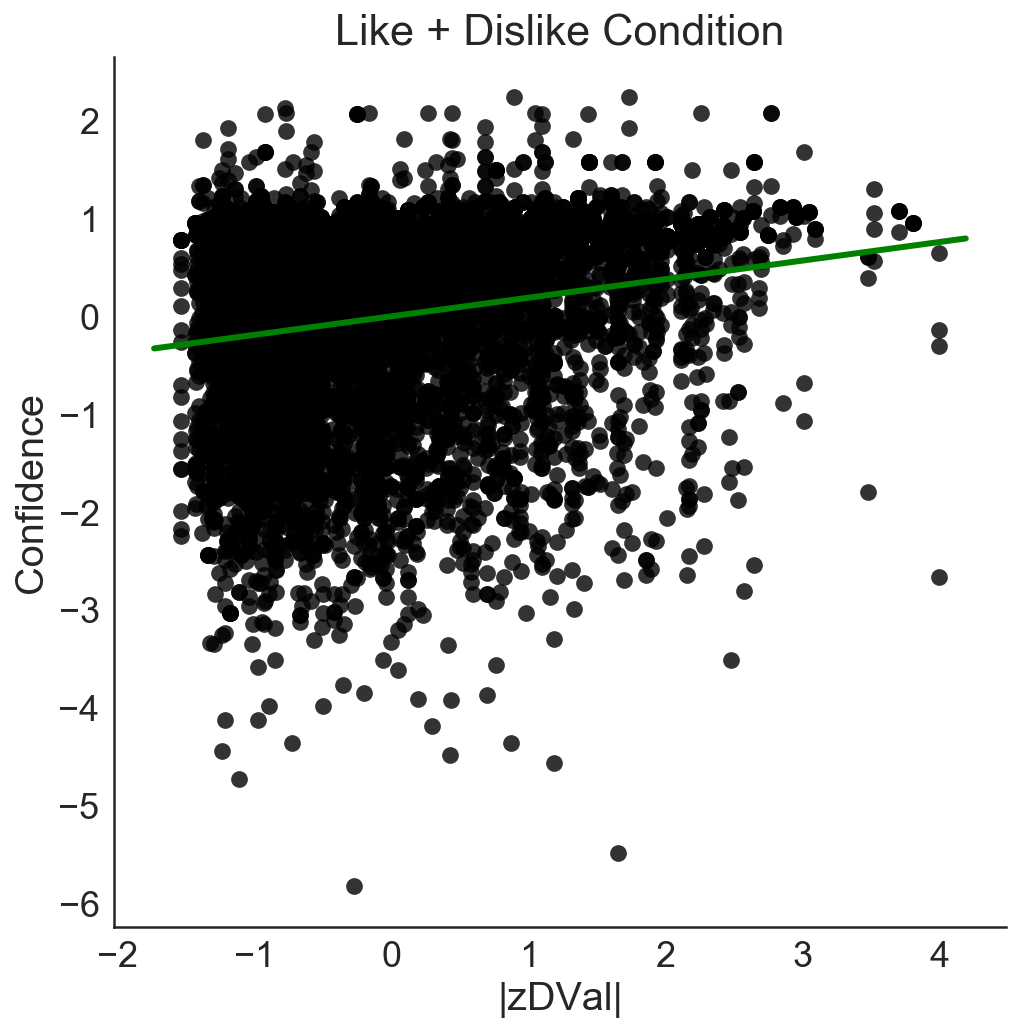

In [211]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_exp1, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_exp1[x_variable]
y=data_exp1[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Green', lw=3)
sns.despine()
ax.set_title('Like + Dislike Condition')



results = pearsonr(data_exp1[x_variable], data_exp1[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

Text(0.5,1,'Correlations Full Exp')

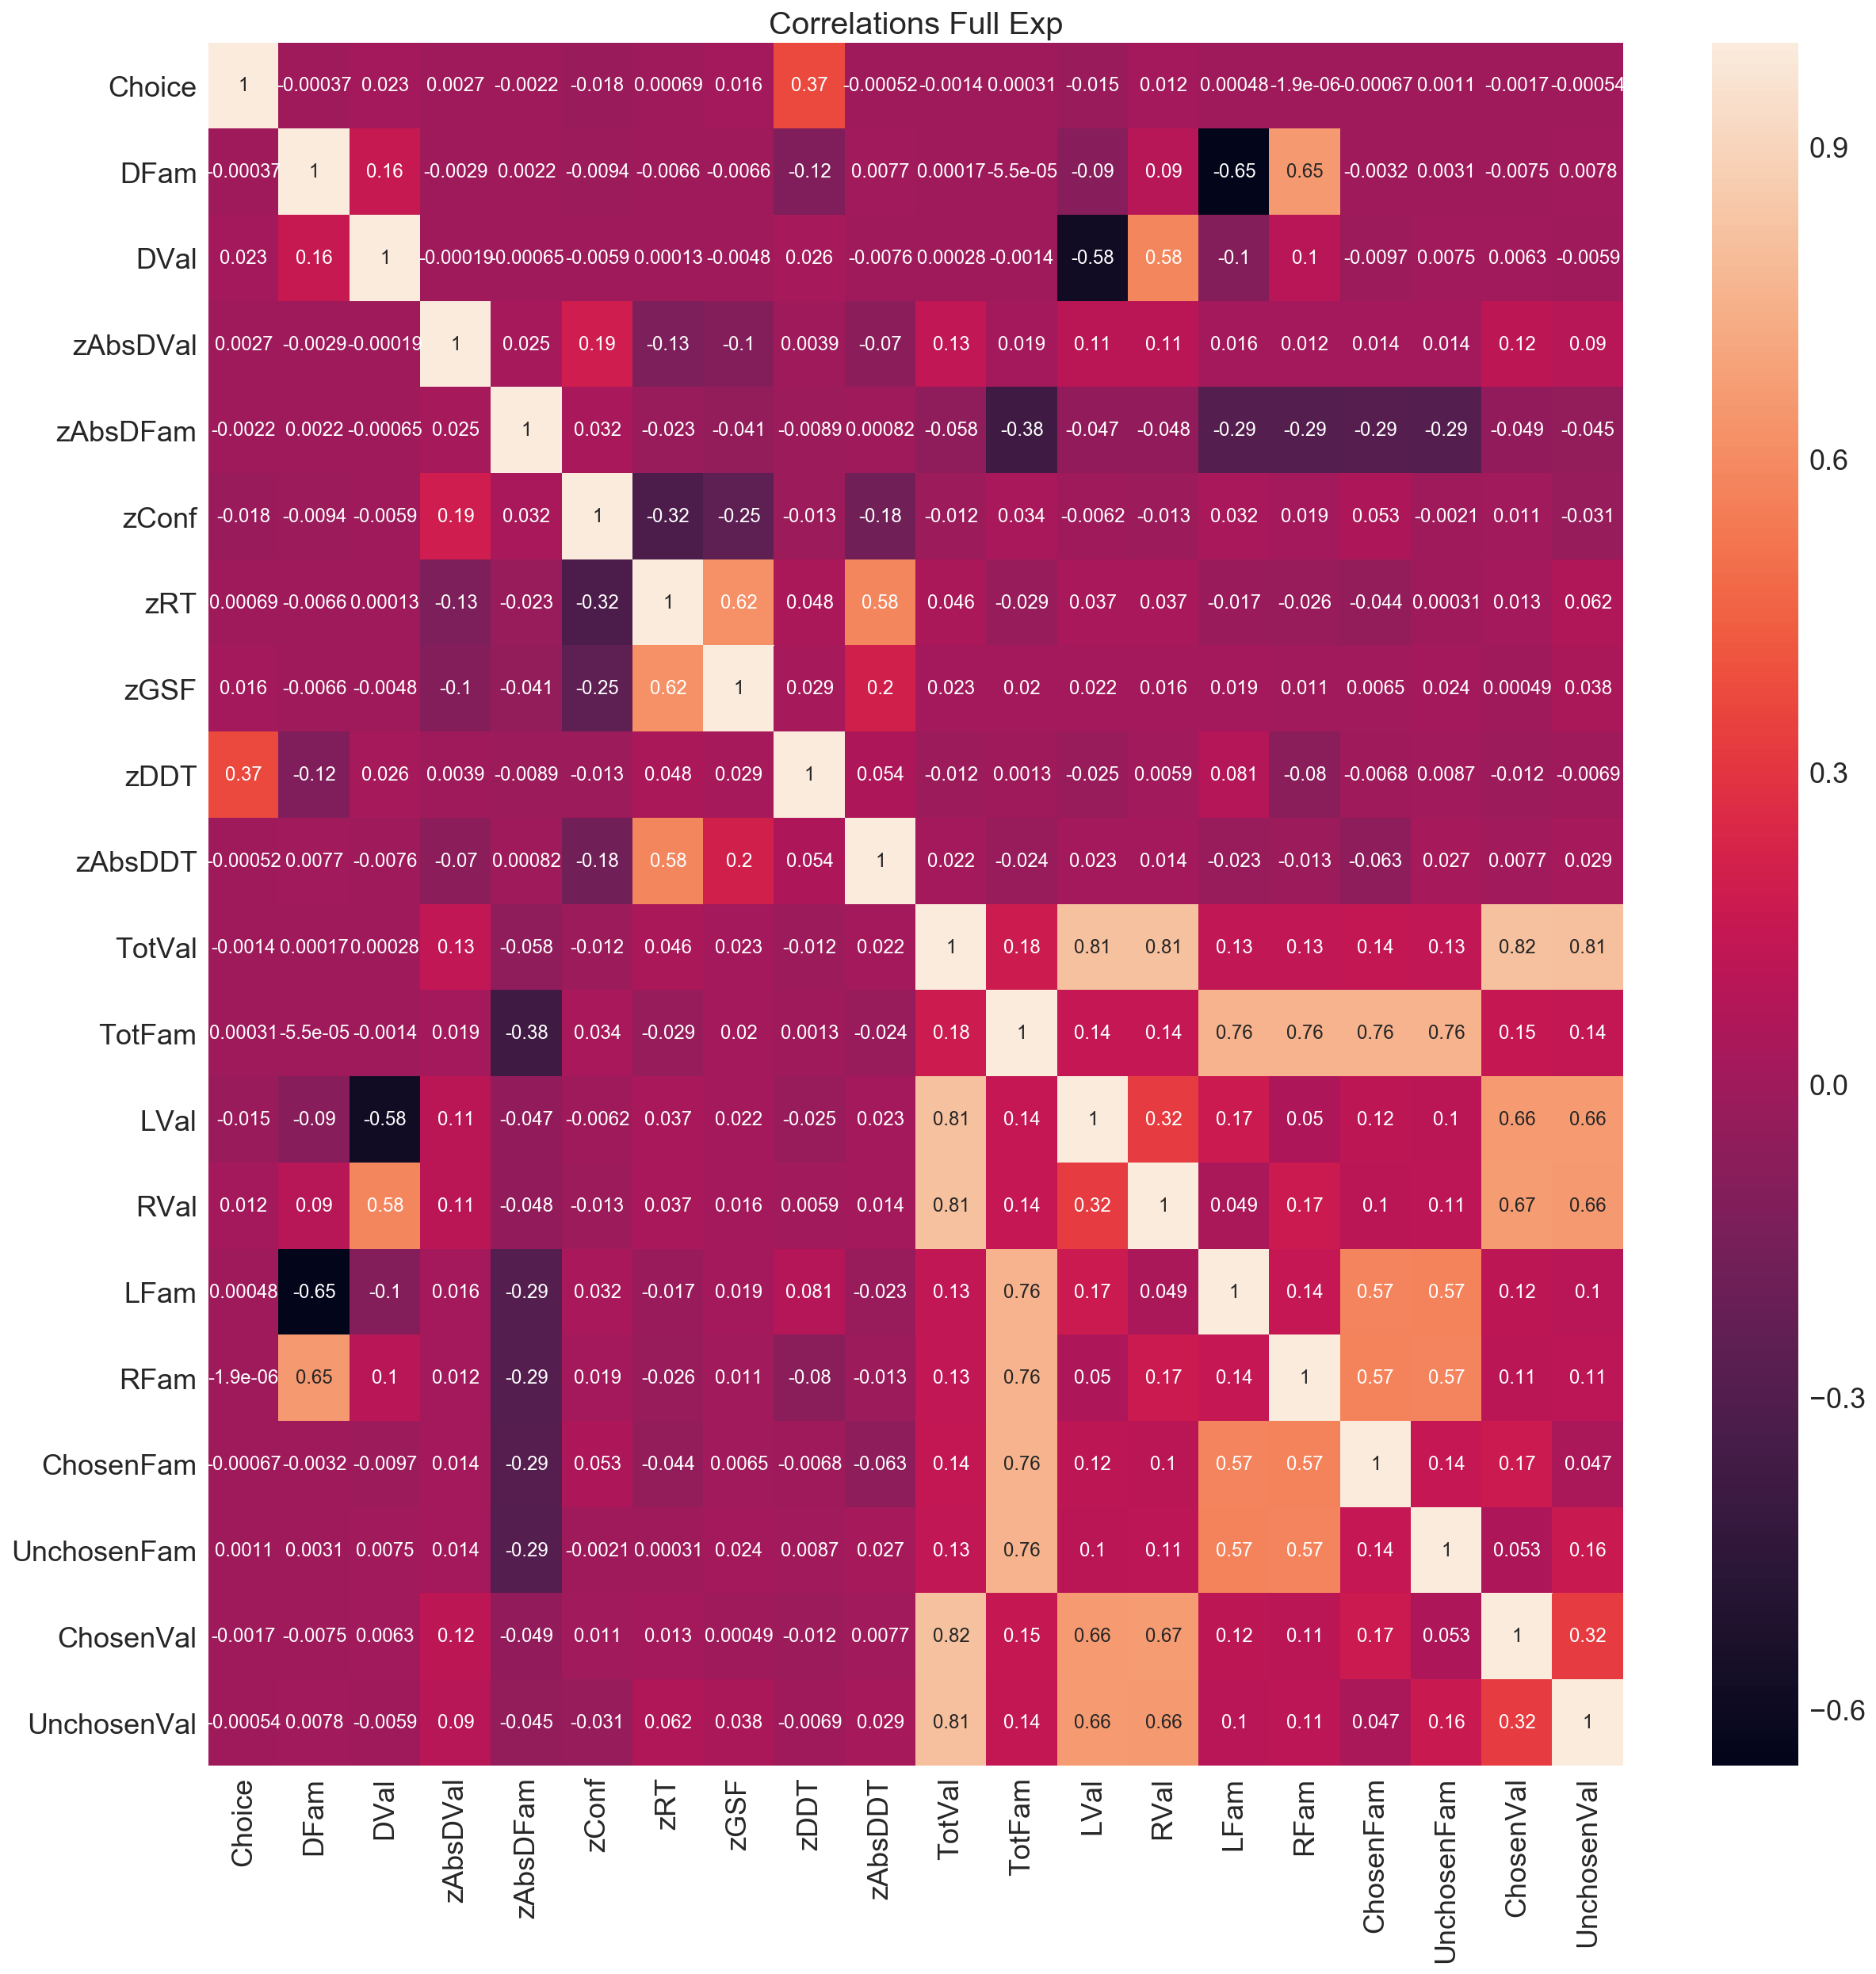

In [236]:
dataColsSelected = data_exp1.loc[:,  ['Choice','DFam','DVal','zAbsDVal','zAbsDFam','zConf','zRT', 'zGSF', 
                                     'zDDT', 'zAbsDDT', 'TotVal','TotFam', 'LVal','RVal','LFam','RFam', 
                                     'ChosenFam','UnchosenFam','ChosenVal', 'UnchosenVal']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data_corr, 
       xticklabels=data_corr.columns,
       yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations Full Exp',fontsize=20)
#sns.set(font_scale=0.8) 

## Like Condition Only

In [213]:
#Select Condition 
data_expL = data_exp1.loc[data_exp1['BlockCond'] == 1] # 1 = Like, 2 = Dislike


### Insert the variables to calculate the correlation

In [214]:
x_variable = 'zAbsDVal'
x_varlabel = '|zDV|'
y_variable = 'zConf'
y_varlabel =  'Confidence'

Pearson's r = 0.192 p =  0.0


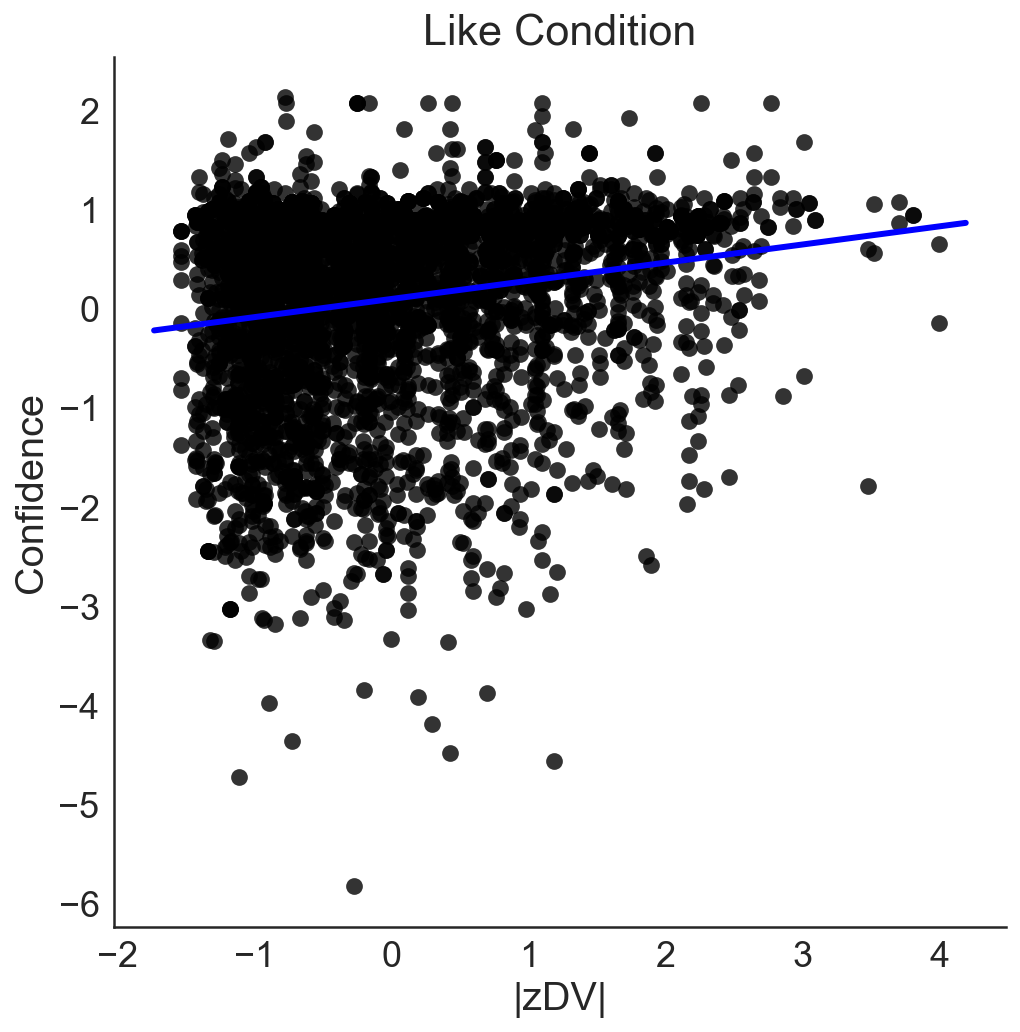

In [215]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expL, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expL[x_variable]
y=data_expL[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)
sns.despine()
ax.set_title('Like Condition')



results = pearsonr(data_expL[x_variable], data_expL[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

Text(0.5,1,'Correlations Like Condition')

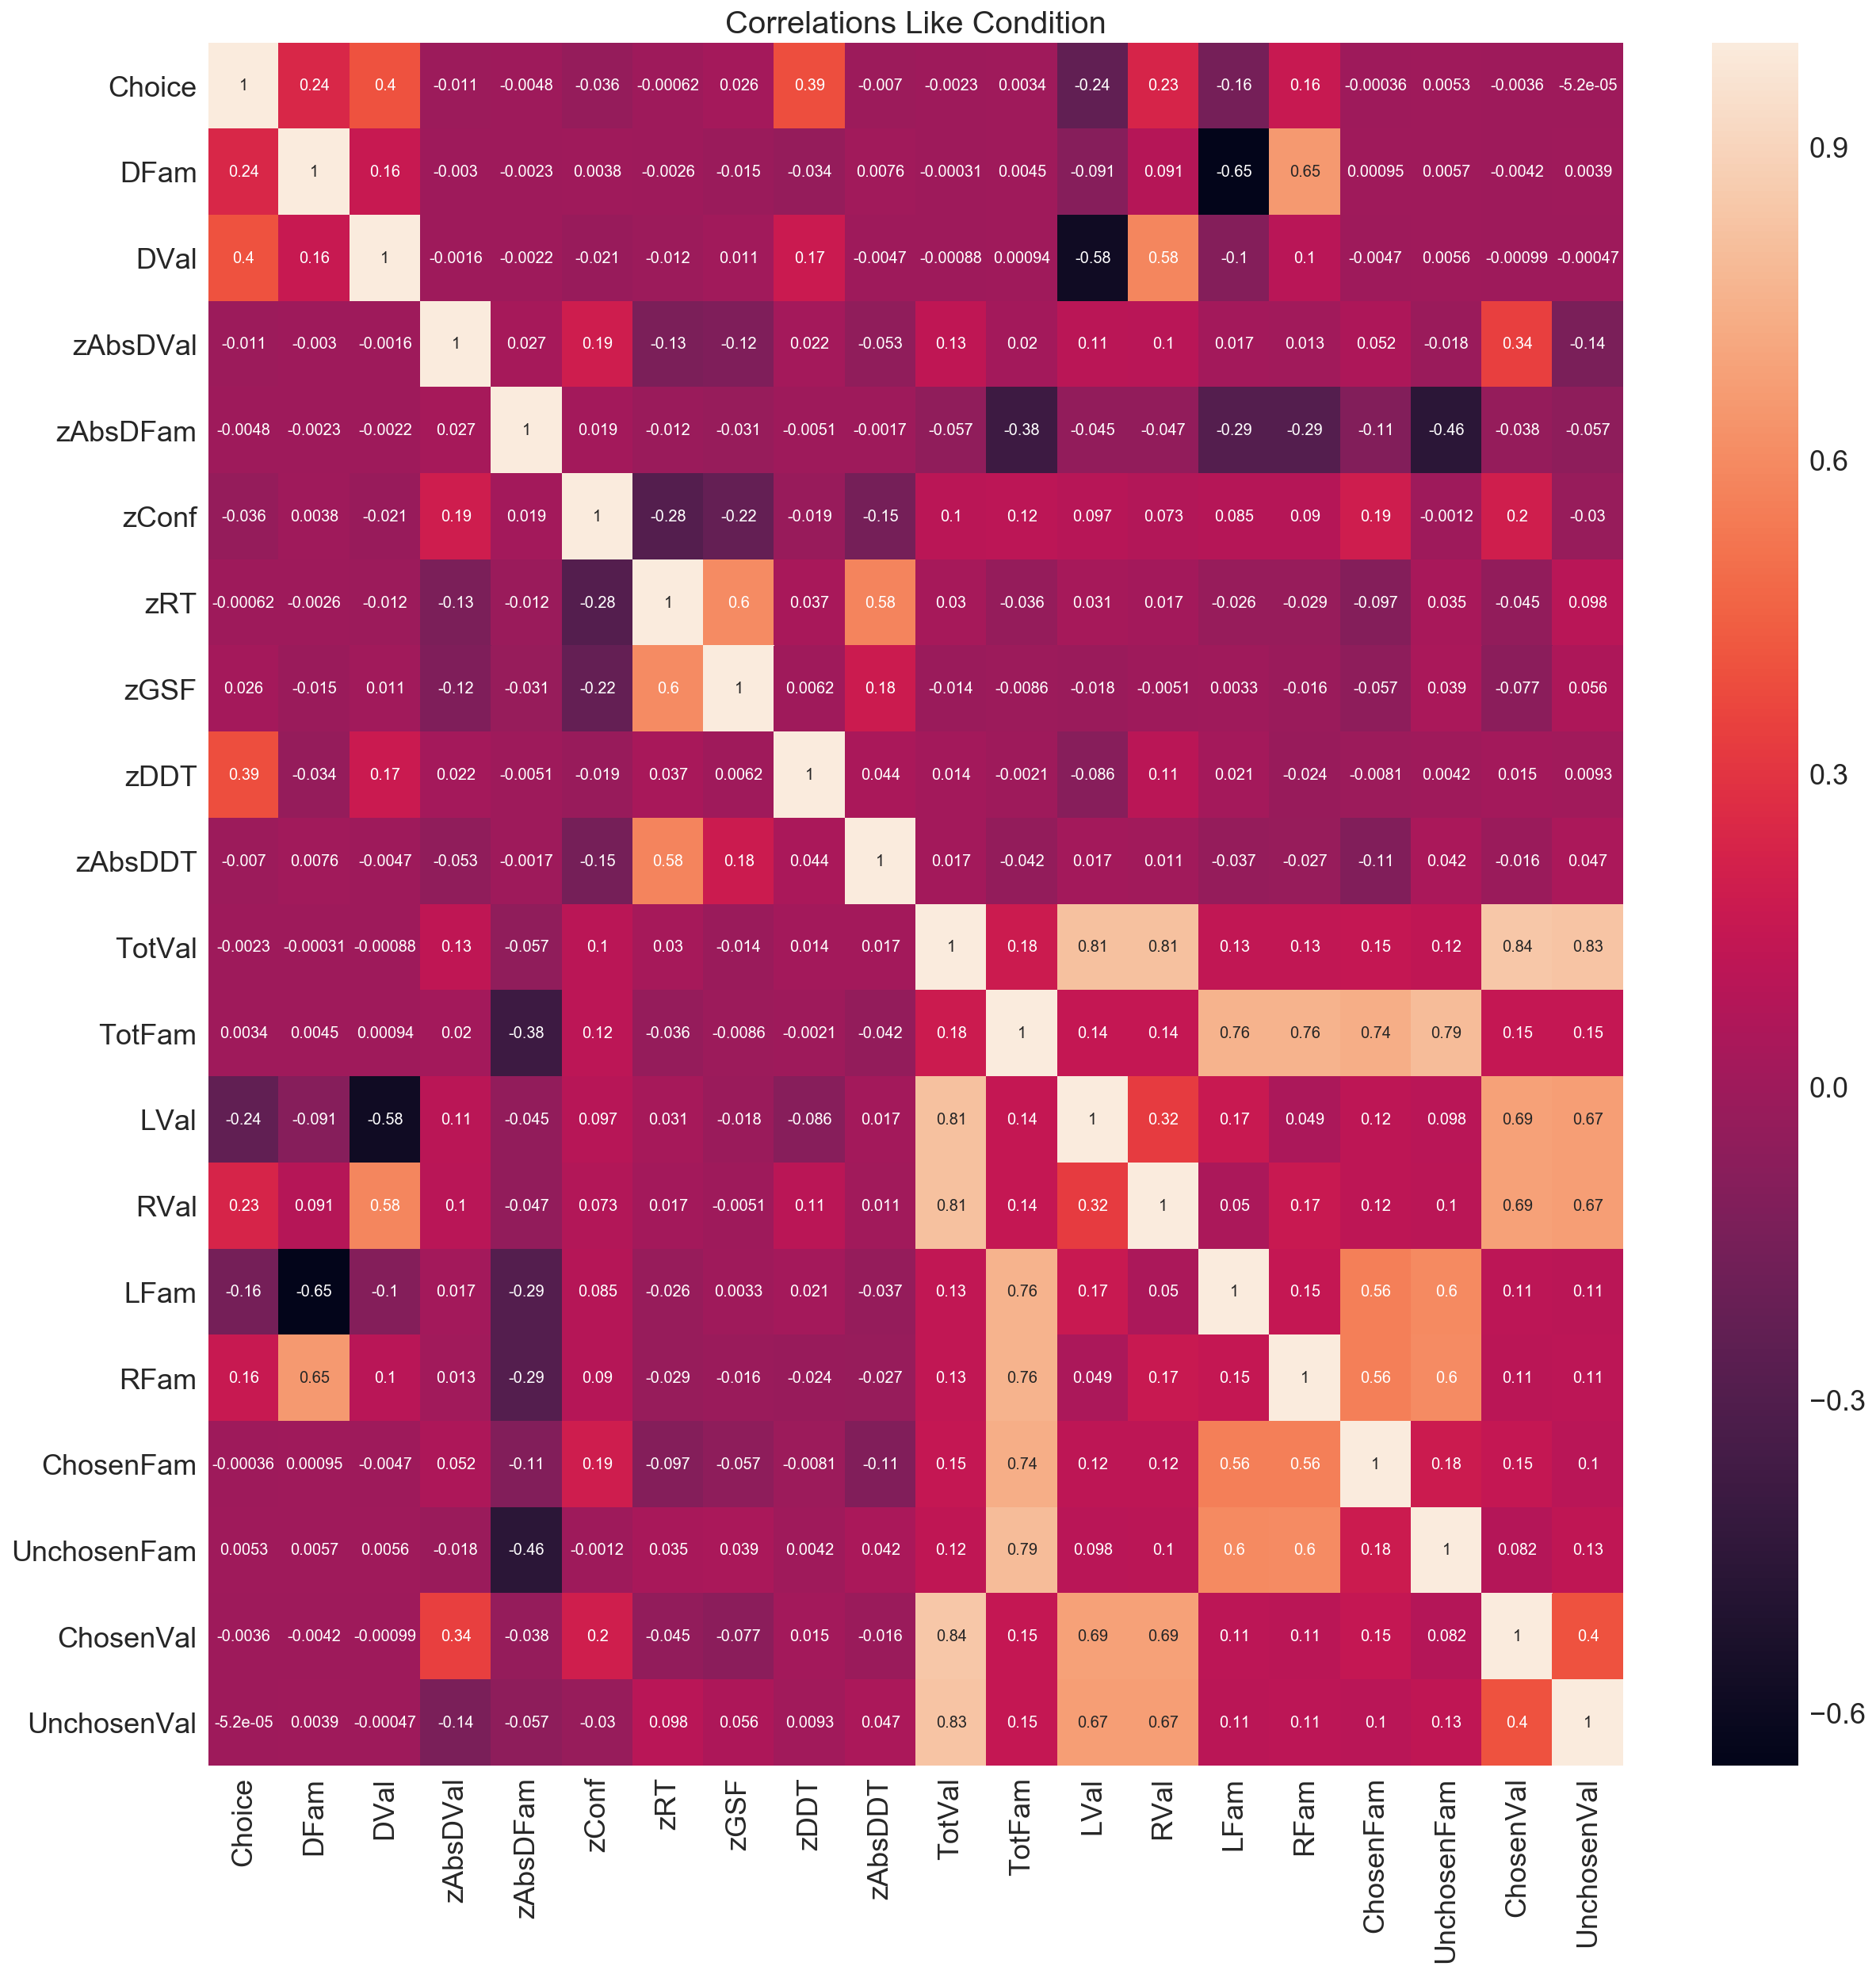

In [235]:
dataColsSelected = data_expL.loc[:, ['Choice','DFam','DVal','zAbsDVal','zAbsDFam','zConf','zRT', 'zGSF', 
                                     'zDDT', 'zAbsDDT', 'TotVal','TotFam', 'LVal','RVal','LFam','RFam', 
                                     'ChosenFam','UnchosenFam','ChosenVal', 'UnchosenVal']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data_corr, 
       xticklabels=data_corr.columns,
       yticklabels=data_corr.columns, annot=True, annot_kws={"size": 10})

ax.set_title('Correlations Like Condition',fontsize=20)

Pearson's r = 0.177 p =  0.0


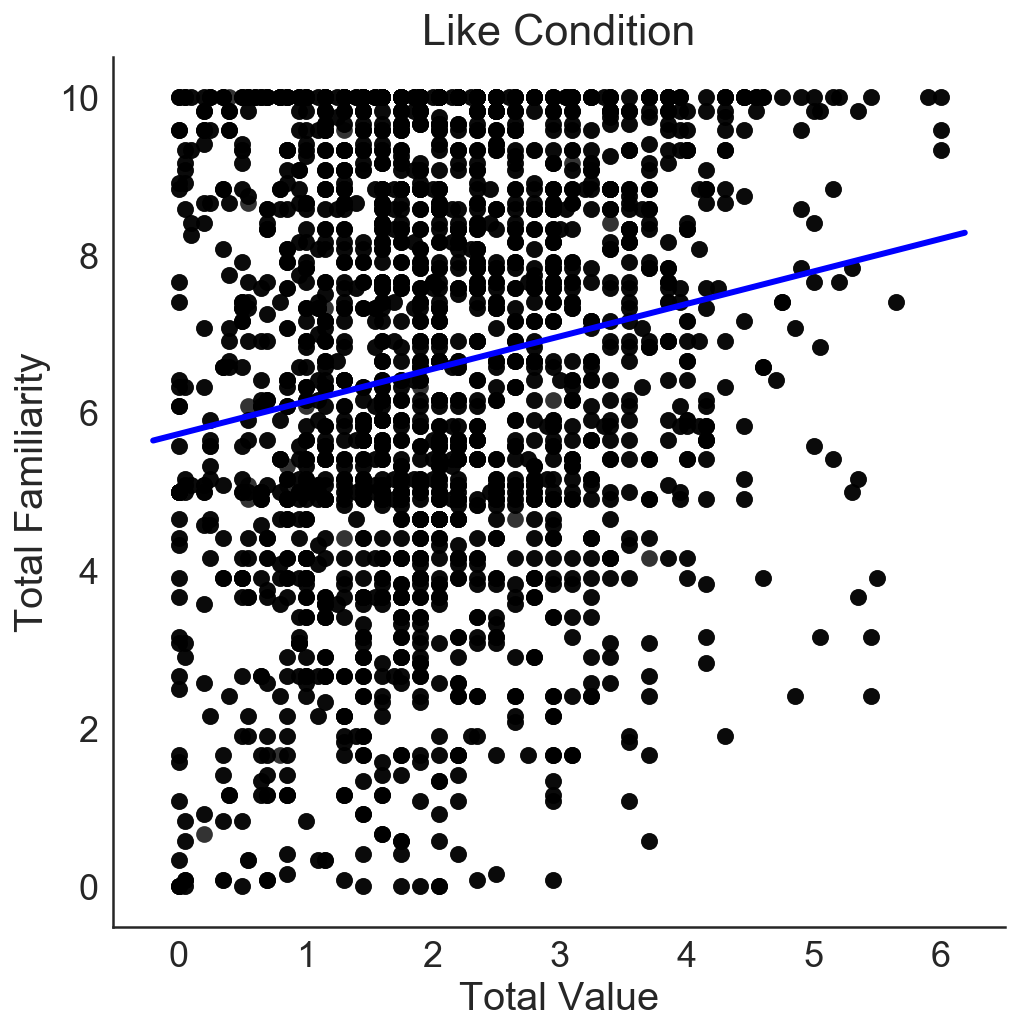

In [217]:
x_variable = 'TotVal'
x_varlabel = 'Total Value'
y_variable = 'TotFam'
y_varlabel =  'Total Familiarity'

f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expL, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expL[x_variable]
y=data_expL[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)
sns.despine()
ax.set_title('Like Condition')

results = pearsonr(data_expL[x_variable], data_expL[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

Pearson's r = 0.115 p =  0.0


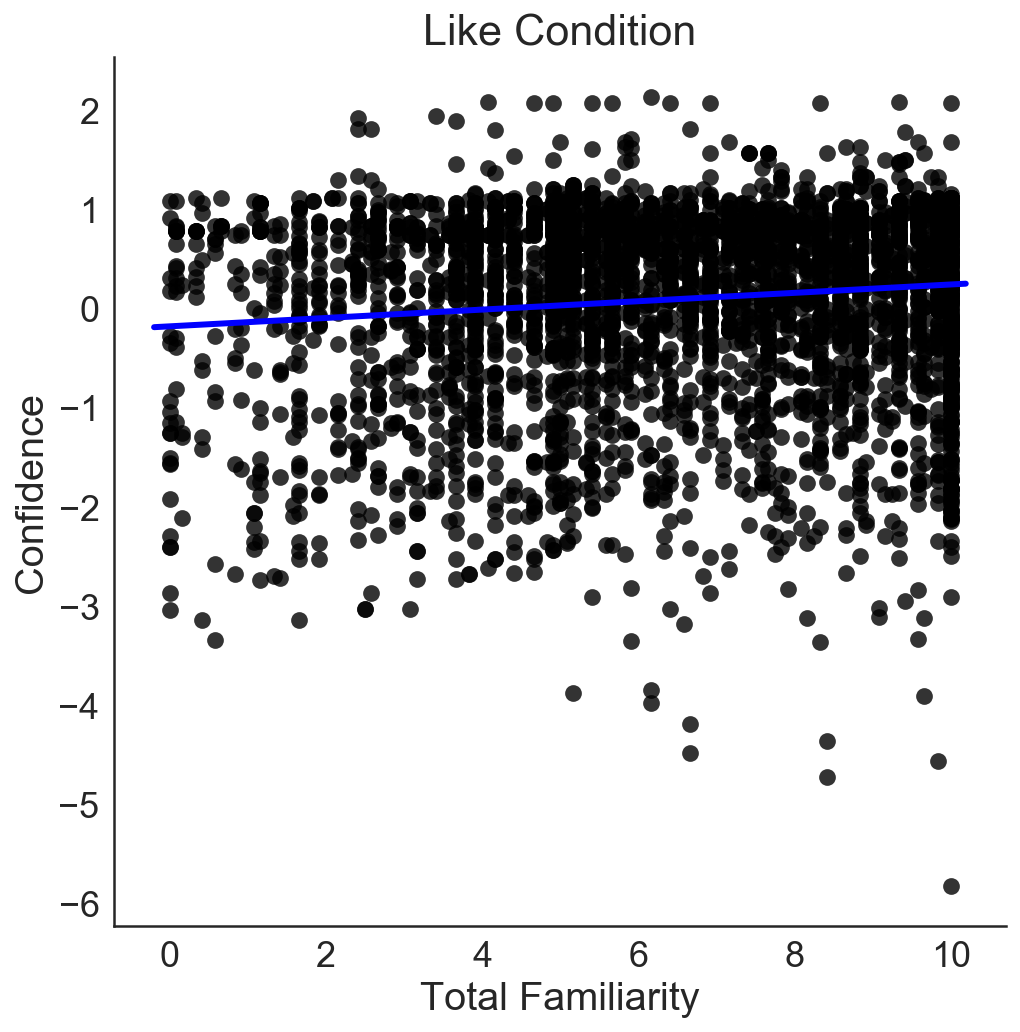

In [218]:
x_variable = 'TotFam'
x_varlabel =  'Total Familiarity'
y_variable = 'zConf'
y_varlabel =  'Confidence'

f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expL, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expL[x_variable]
y=data_expL[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)
sns.despine()
ax.set_title('Like Condition')

results = pearsonr(data_expL[x_variable], data_expL[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

Text(0.5,1,'Like Condition')

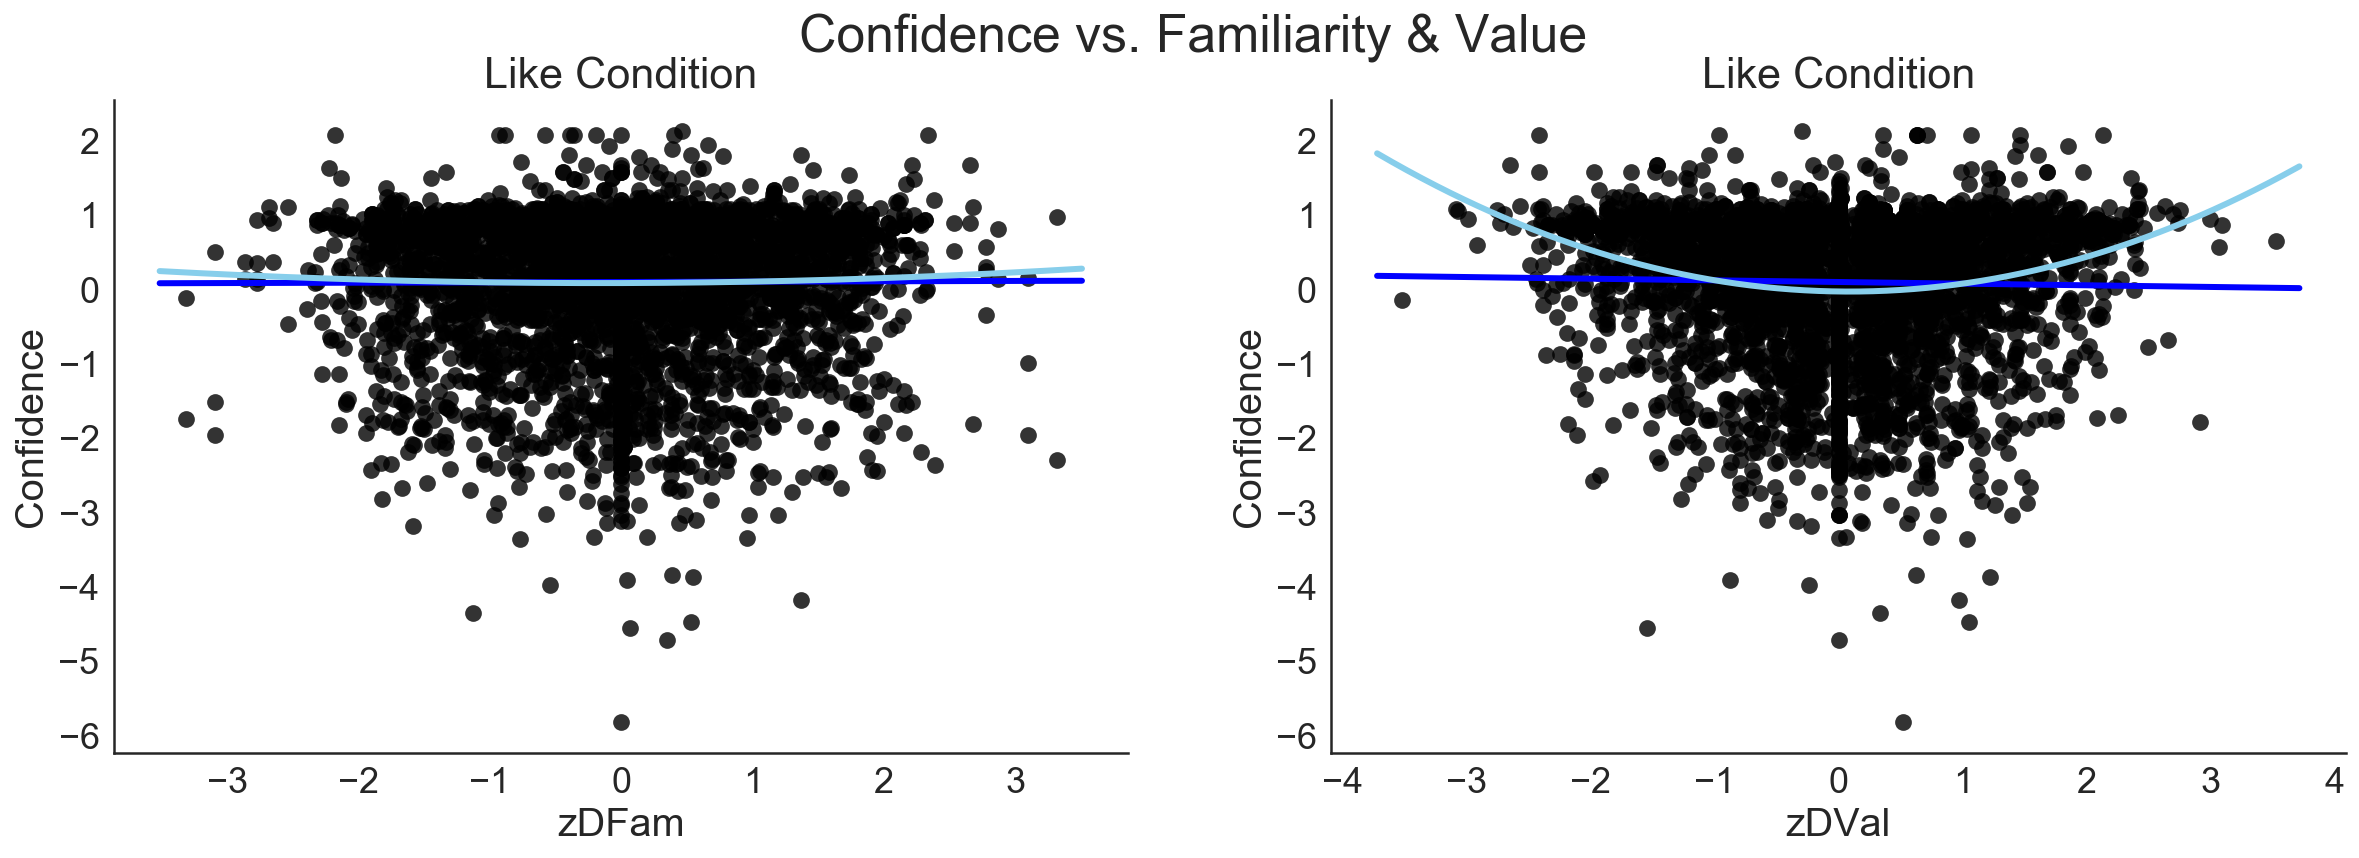

In [219]:

f = plt.figure(figsize=(20,6))
sns.set(style='white', font_scale=1.8)
plt.suptitle('Confidence vs. Familiarity & Value')

plt.subplot(121)
x_variable = 'zDFam'
x_varlabel =  'zDFam'
y_variable = 'zConf'
y_varlabel =  'Confidence'

ax = sns.regplot(data=data_expL, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

x=data_expL[x_variable]
y=data_expL[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)

fit = np.polyfit(x, y, deg=2)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='skyblue', lw=3)

sns.despine()
ax.set_title('Like Condition')

#results = pearsonr(data_expL[x_variable], data_expL[y_variable])
#print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

plt.subplot(122)
x_variable = 'zDVal'
x_varlabel =  'zDVal'
y_variable = 'zConf'
y_varlabel =  'Confidence'

ax = sns.regplot(data=data_expL, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expL[x_variable]
y=data_expL[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)

fit = np.polyfit(x, y, deg=2)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='skyblue', lw=3)

sns.despine()
ax.set_title('Like Condition')

#results = pearsonr(data_expL[x_variable], data_expL[y_variable])
#print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

## Dislike Condition Only

In [220]:
data_expD = data_exp1.loc[data_exp1['BlockCond'] == 2] # 1 = Like, 2 = Dislike

### Insert the variables to calculate the correlation

In [221]:
x_variable = 'zAbsDVal'
x_varlabel = '|zDV|'
y_variable = 'zConf'
y_varlabel =  'Confidence'

Pearson's r = 0.19 p =  0.0


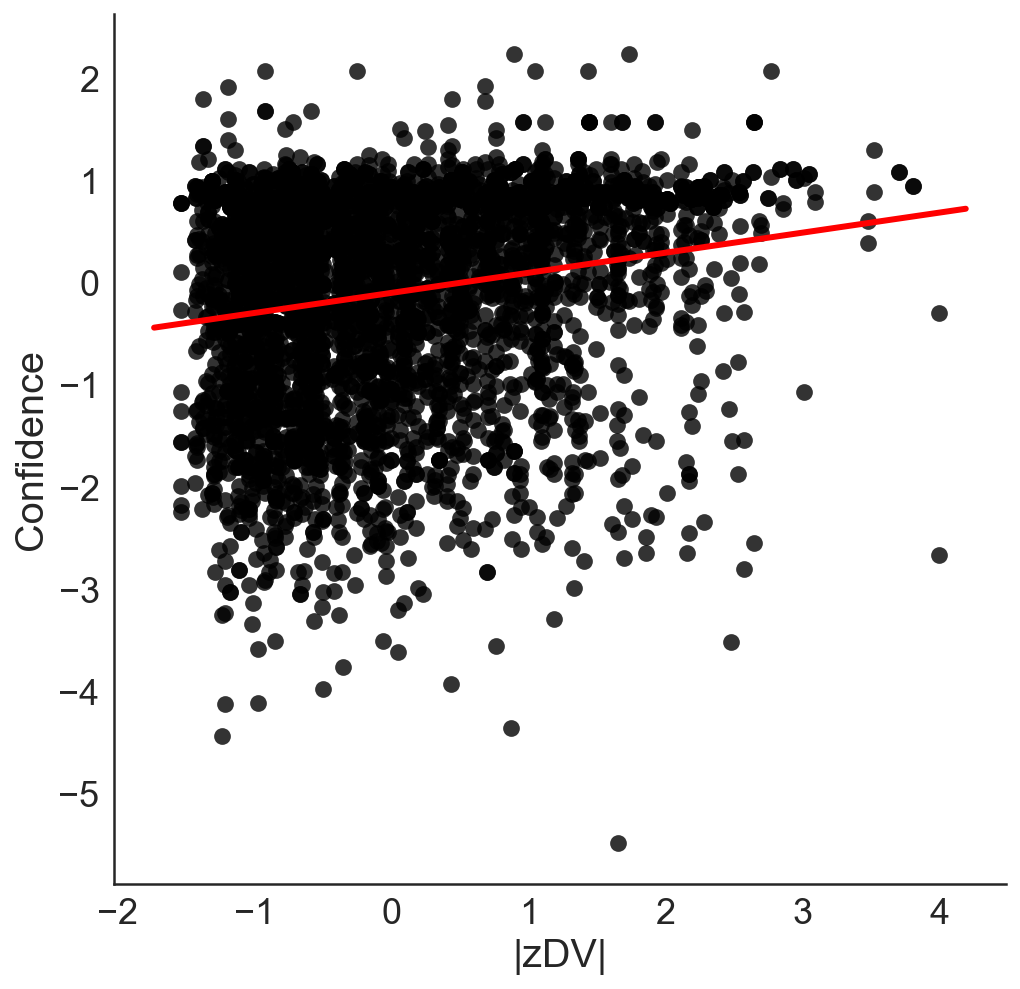

In [222]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expD, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expD[x_variable]
y=data_expD[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_expD[x_variable], data_expD[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

Text(0.5,1,'Correlations Dislike Condition')

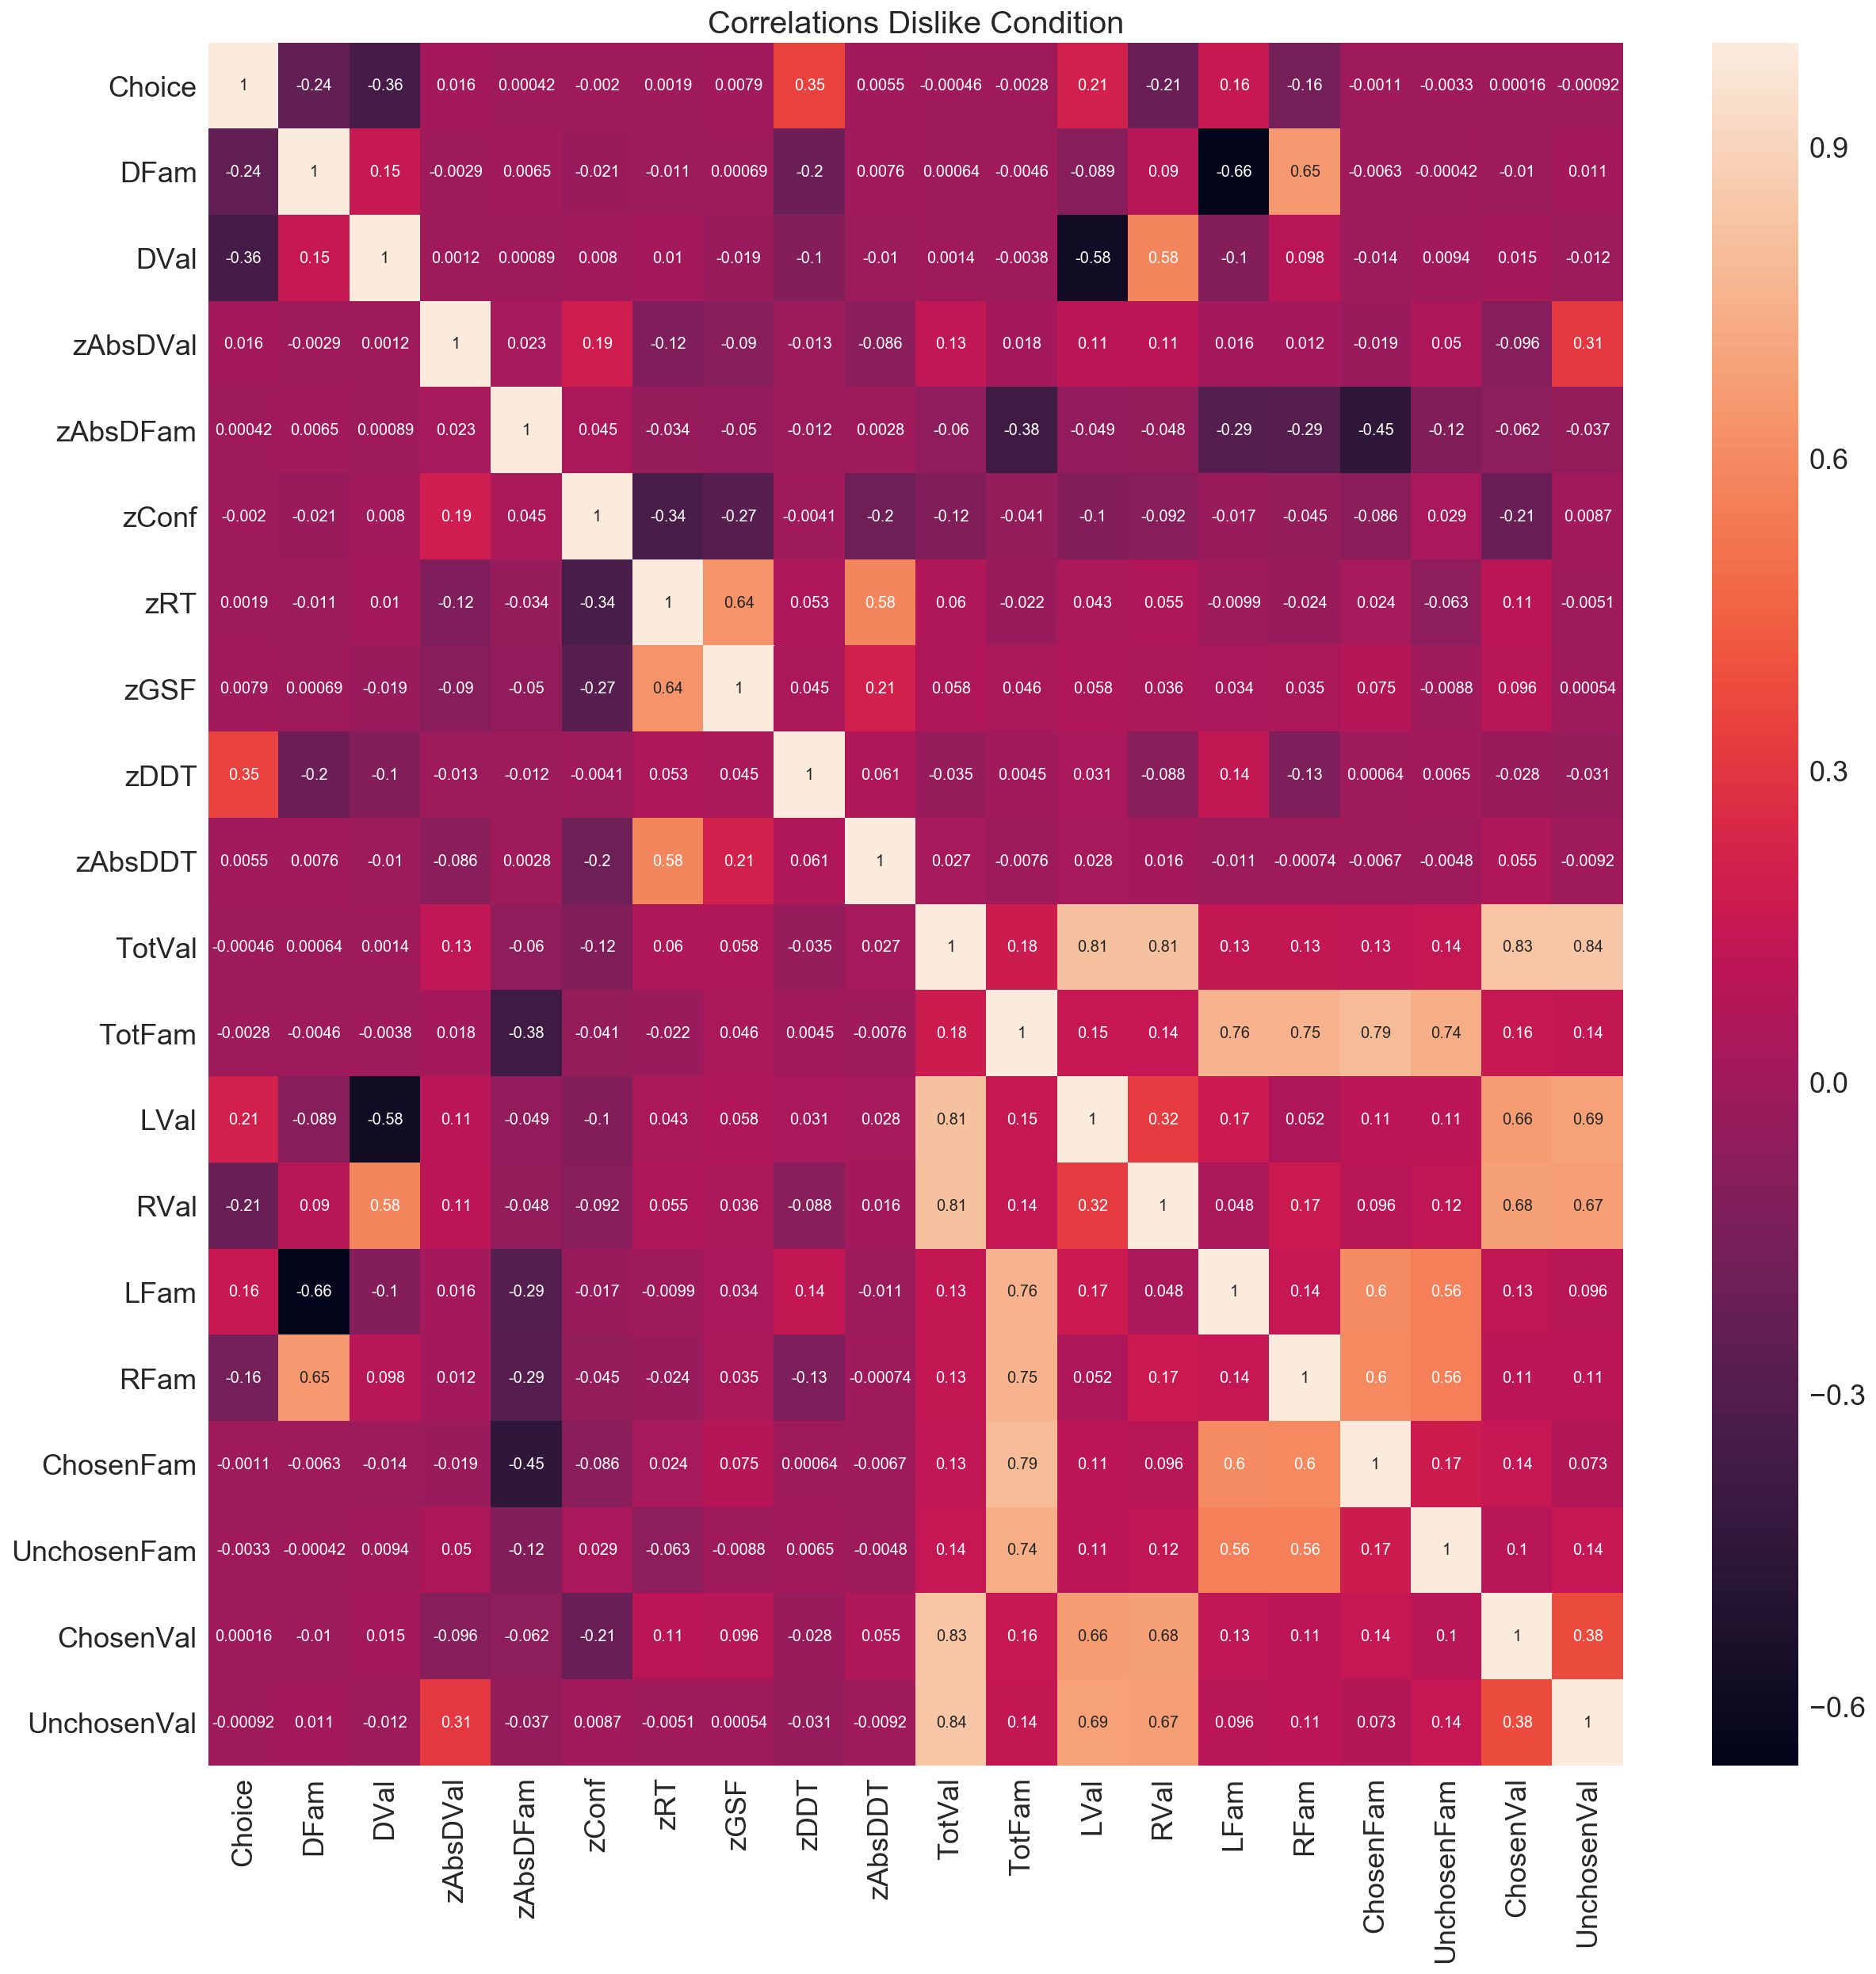

In [237]:
dataColsSelected = data_expD.loc[:, ['Choice','DFam','DVal','zAbsDVal','zAbsDFam','zConf','zRT', 'zGSF', 
                                     'zDDT', 'zAbsDDT', 'TotVal','TotFam', 'LVal','RVal','LFam','RFam', 
                                     'ChosenFam','UnchosenFam','ChosenVal', 'UnchosenVal']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data_corr, 
       xticklabels=data_corr.columns,
       yticklabels=data_corr.columns, annot=True, annot_kws={"size": 10})

ax.set_title('Correlations Dislike Condition',fontsize=20)

Pearson's r = 0.177 p =  0.0


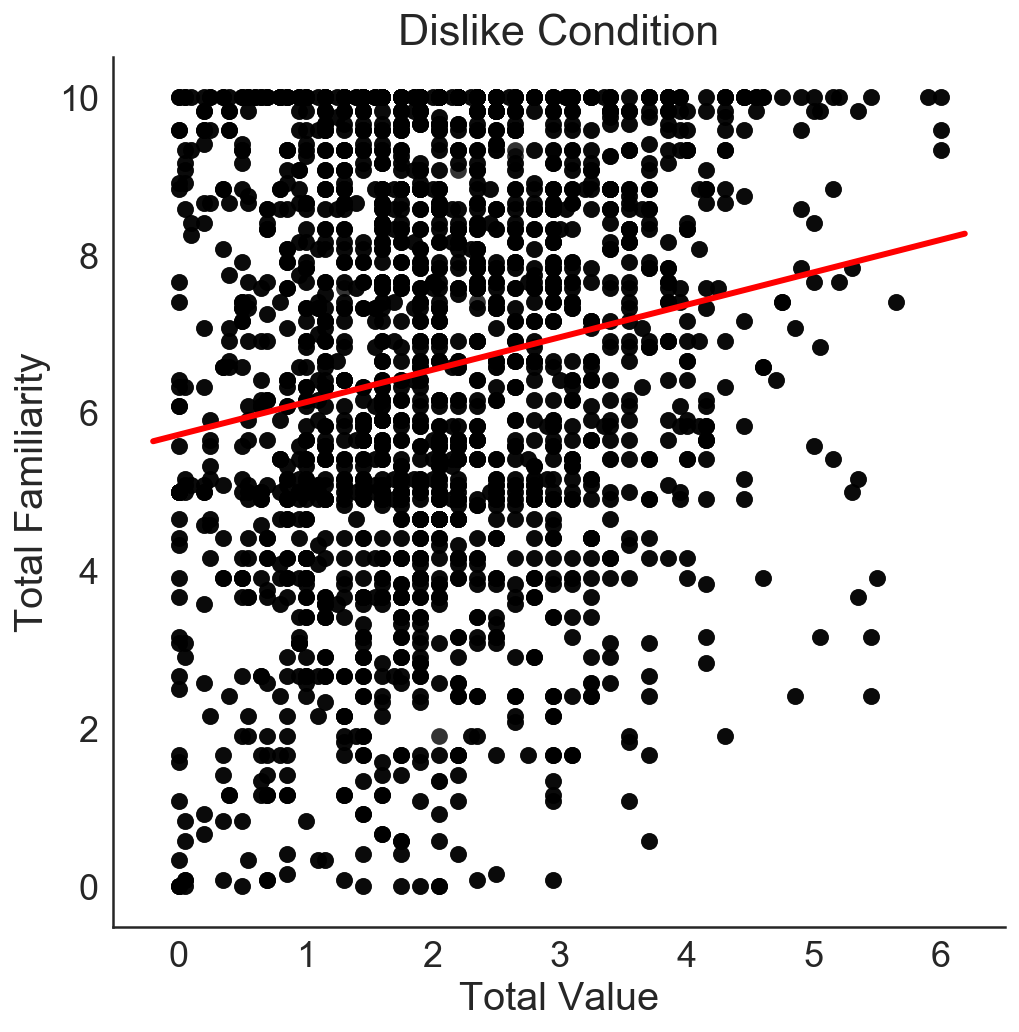

In [224]:
x_variable = 'TotVal'
x_varlabel = 'Total Value'
y_variable = 'TotFam'
y_varlabel =  'Total Familiarity'

f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expD, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expD[x_variable]
y=data_expD[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()
ax.set_title('Dislike Condition')

results = pearsonr(data_expD[x_variable], data_expD[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

Pearson's r = -0.041 p =  0.009


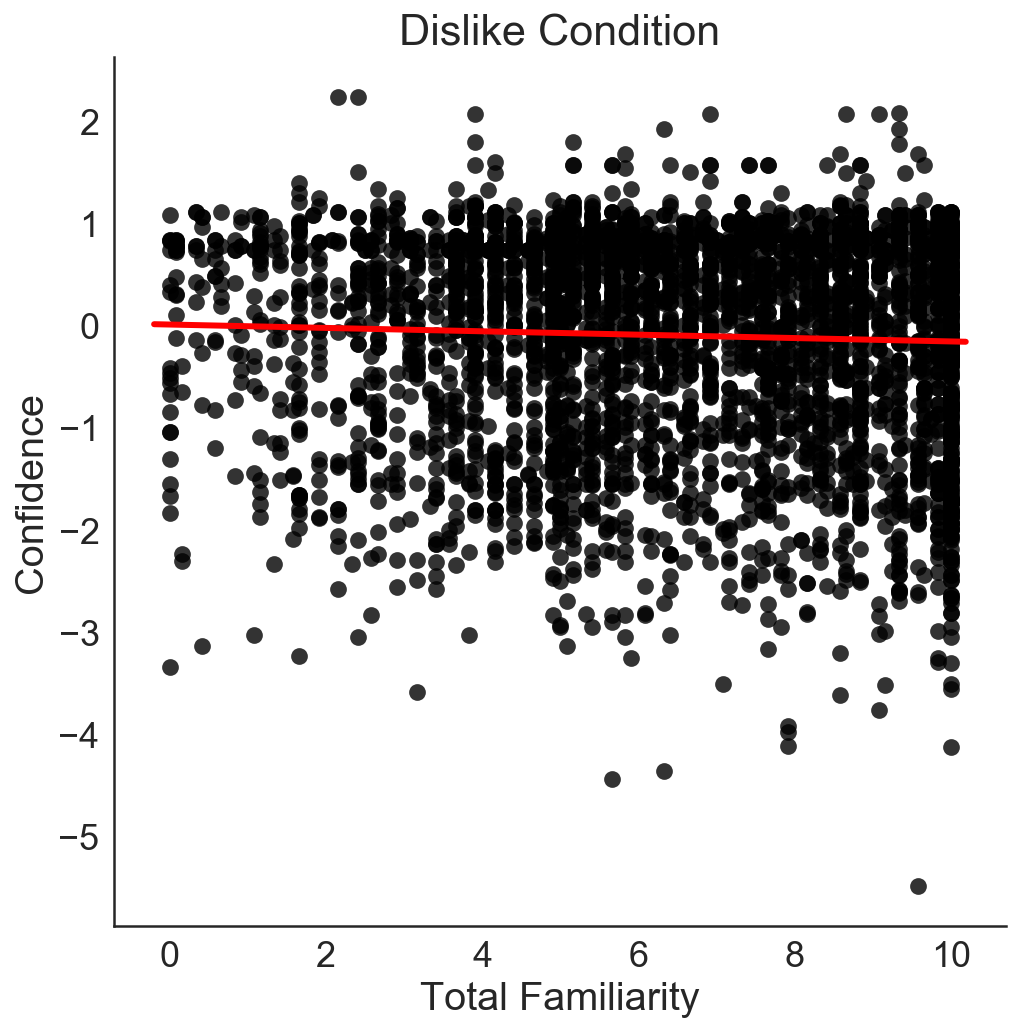

In [225]:
x_variable = 'TotFam'
x_varlabel =  'Total Familiarity'
y_variable = 'zConf'
y_varlabel =  'Confidence'

f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expD, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expD[x_variable]
y=data_expD[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()
ax.set_title('Dislike Condition')

results = pearsonr(data_expD[x_variable], data_expD[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

Text(0.5,1,'Dislike Condition')

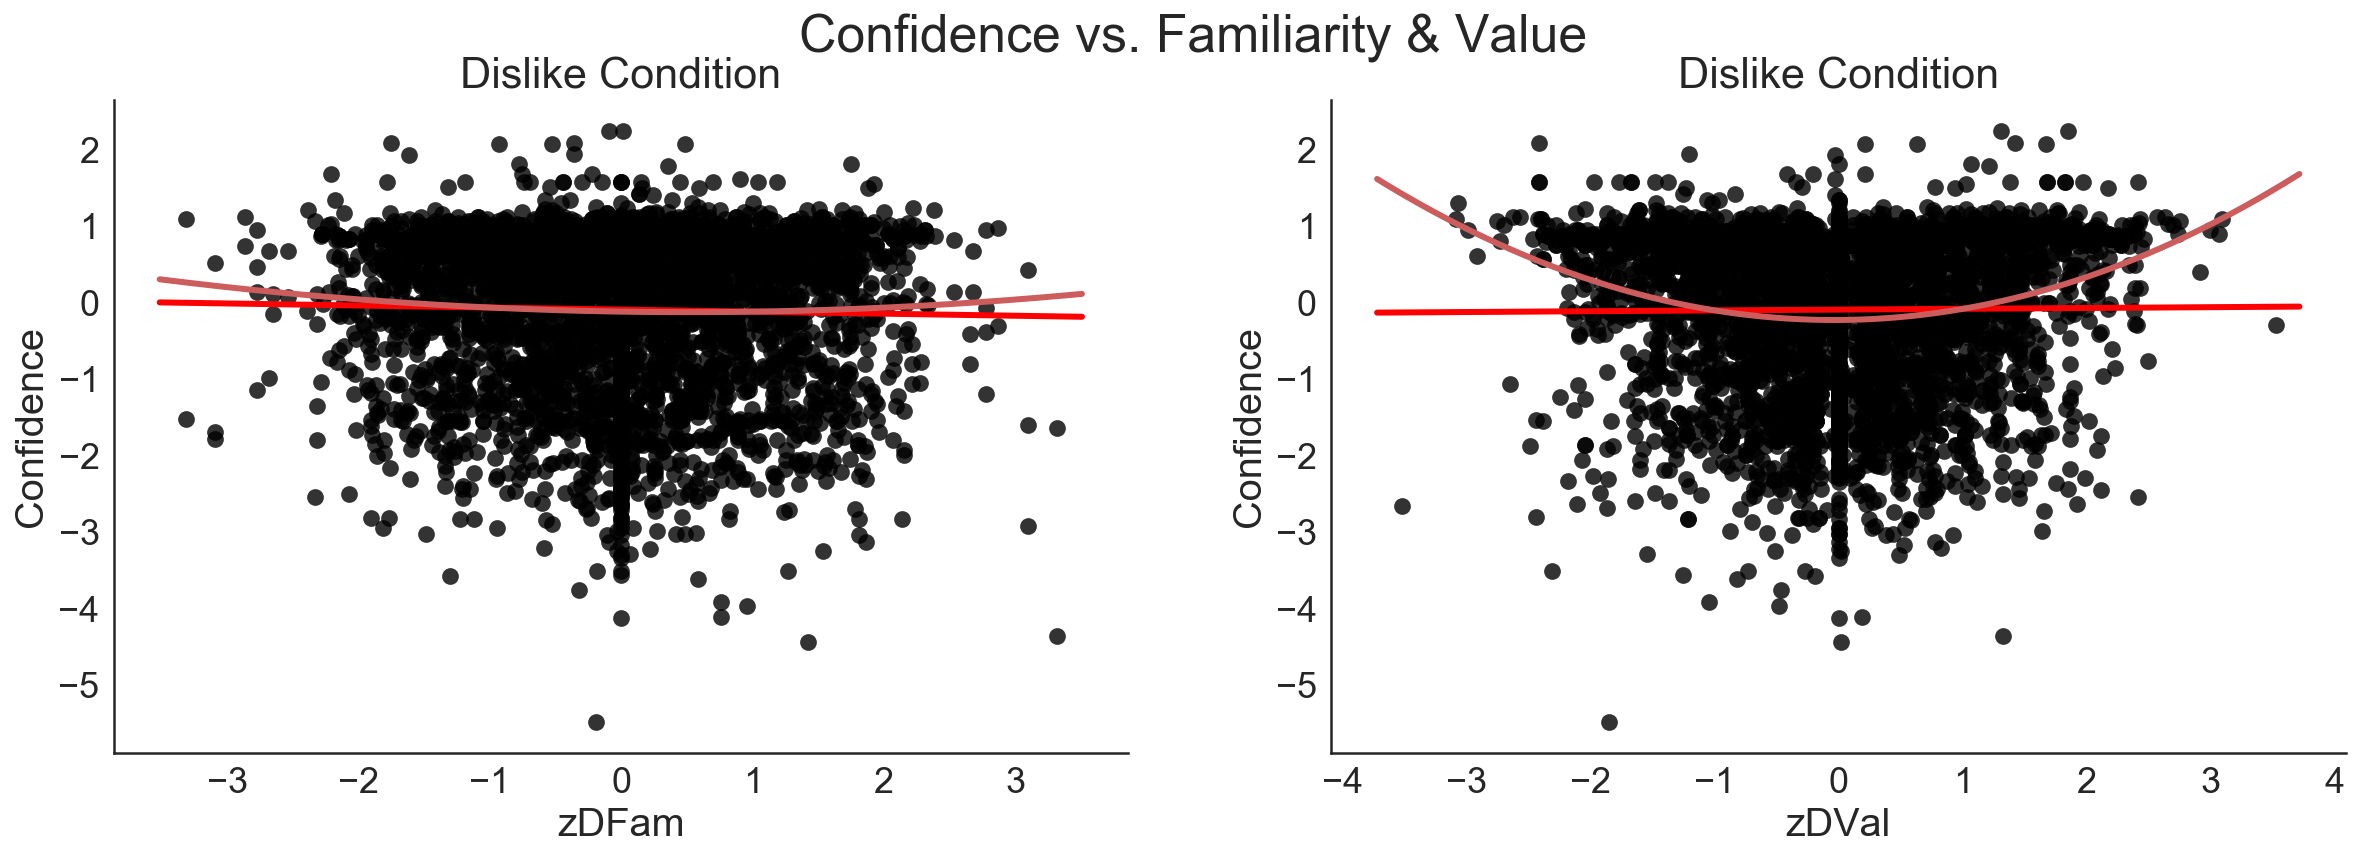

In [226]:

f = plt.figure(figsize=(20,6))
sns.set(style='white', font_scale=1.8)
plt.suptitle('Confidence vs. Familiarity & Value')

plt.subplot(121)
x_variable = 'zDFam'
x_varlabel =  'zDFam'
y_variable = 'zConf'
y_varlabel =  'Confidence'

ax = sns.regplot(data=data_expD, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

x=data_expD[x_variable]
y=data_expD[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)

fit = np.polyfit(x, y, deg=2)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='indianred', lw=3)

sns.despine()
ax.set_title('Dislike Condition')

#results = pearsonr(data_expD[x_variable], data_expD[y_variable])
#print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

plt.subplot(122)
x_variable = 'zDVal'
x_varlabel =  'zDVal'
y_variable = 'zConf'
y_varlabel =  'Confidence'

ax = sns.regplot(data=data_expD, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expD[x_variable]
y=data_expD[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)

fit = np.polyfit(x, y, deg=2)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='indianred', lw=3)

sns.despine()
ax.set_title('Dislike Condition')

#results = pearsonr(data_expD[x_variable], data_expD[y_variable])
#print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

## [Go to Logistic plots for Familiarity ](#logisticFam)

<a id='log'></a>
# 2. Logistic Plots

<a id='logisticVal'></a>
## 2.1. Difference in value (DV) is calculated as (Value_Right  - Value_Left)

## Like Condition

/Users/pradyumna/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


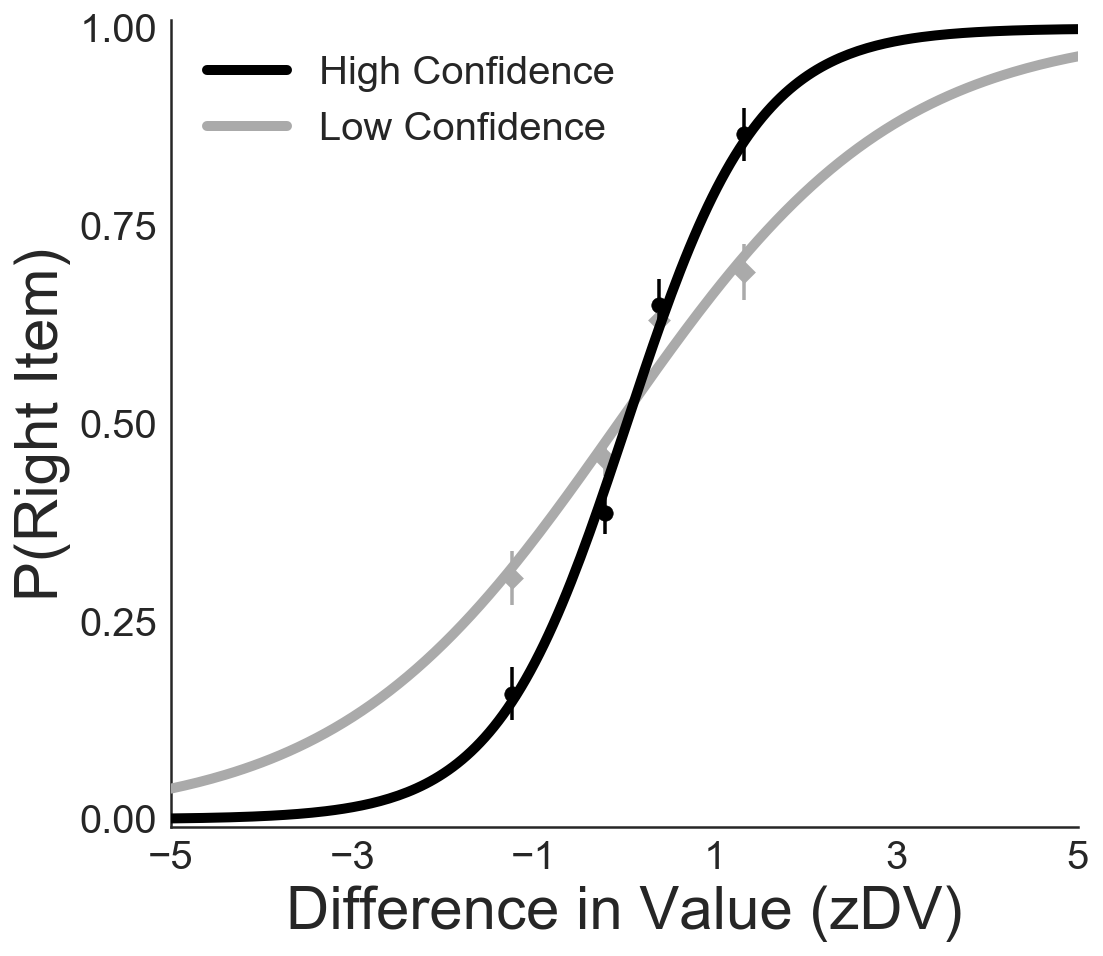

In [38]:
# Split by high/low conf
logisticplot_all('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (zDV)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


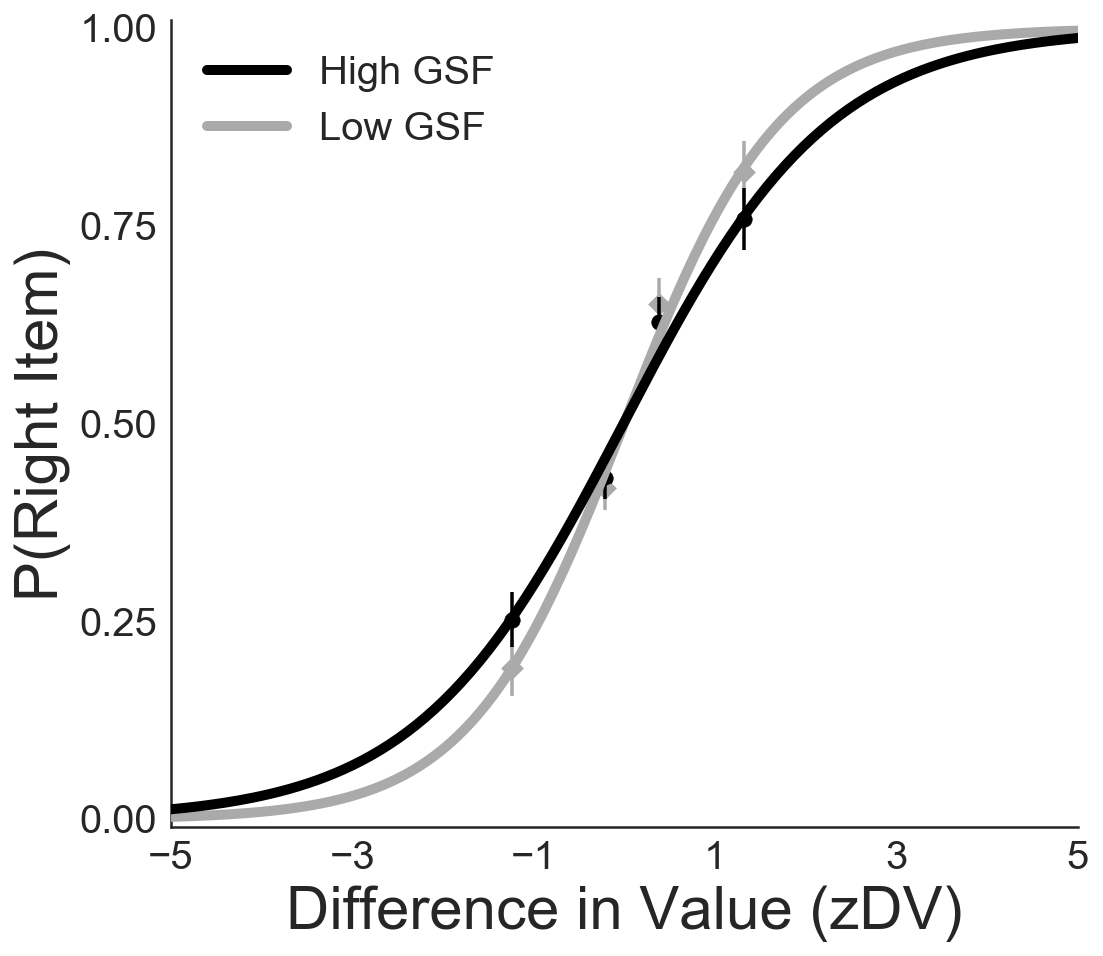

In [42]:
# Split by high/low gaze shift frequency
logisticplot_all('GSFSplit', 'High GSF', 'Low GSF', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (zDV)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


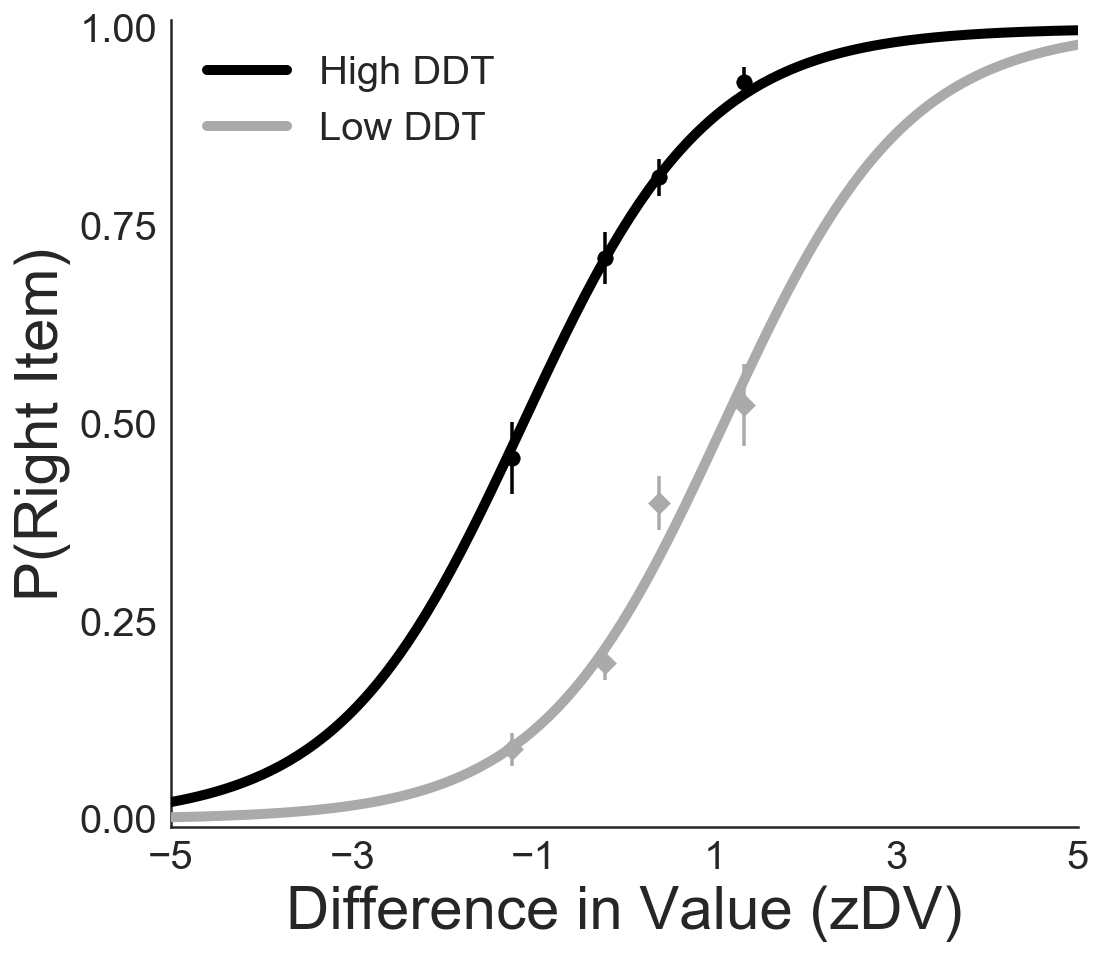

In [43]:
# Split by high/low dwelling time
logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (zDV)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

In [41]:
##absolute DDT
#logisticplot_all('absDDTMedSplit', 'High absDDT', 'Low absDDT', data=data_expL
#            , xaxis='zDV', yaxis='ChosenITM', ylab='P(Right Item)', xlab='Difference in Value (DV)',
#                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
#plt.tight_layout()

## Dislike Condition

/Users/pradyumna/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


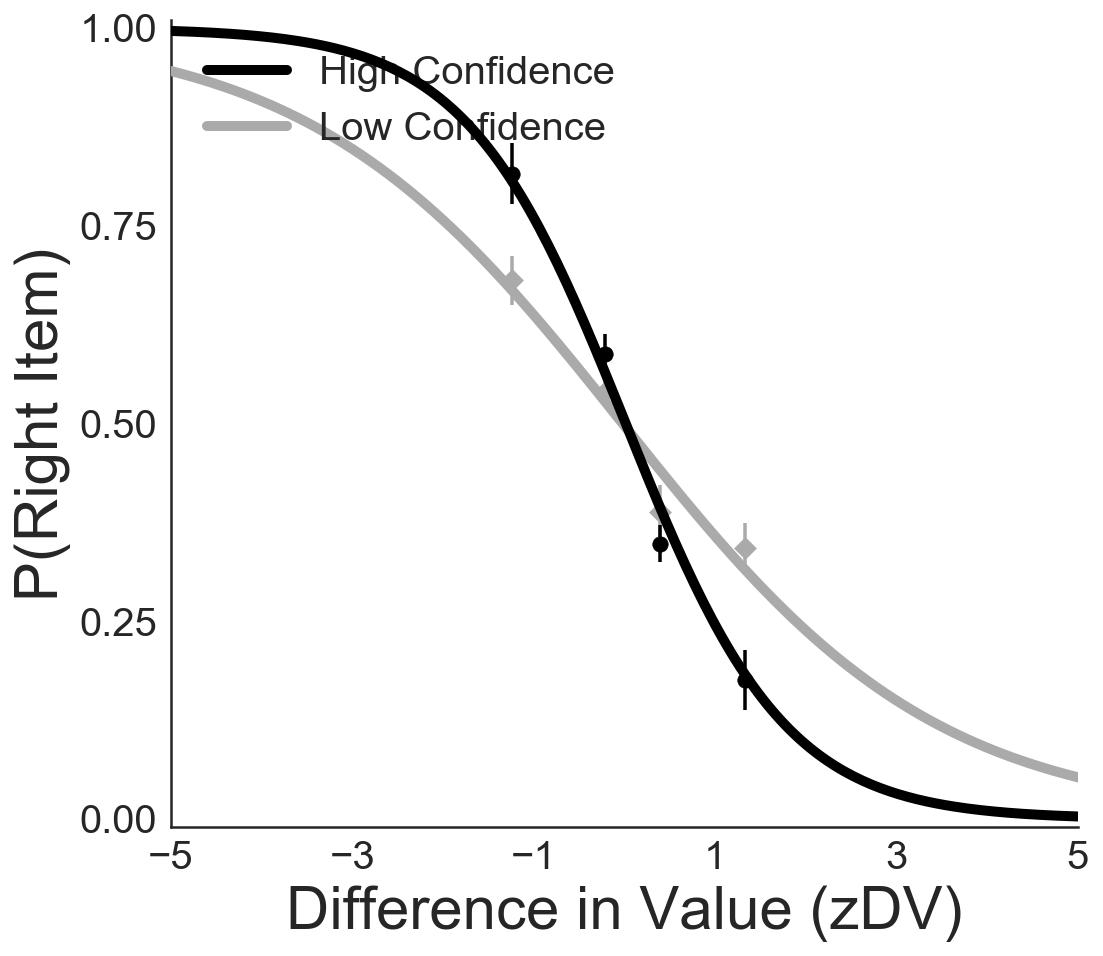

In [44]:
# Split by high/low conf
logisticplot_all('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expD, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (zDV)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


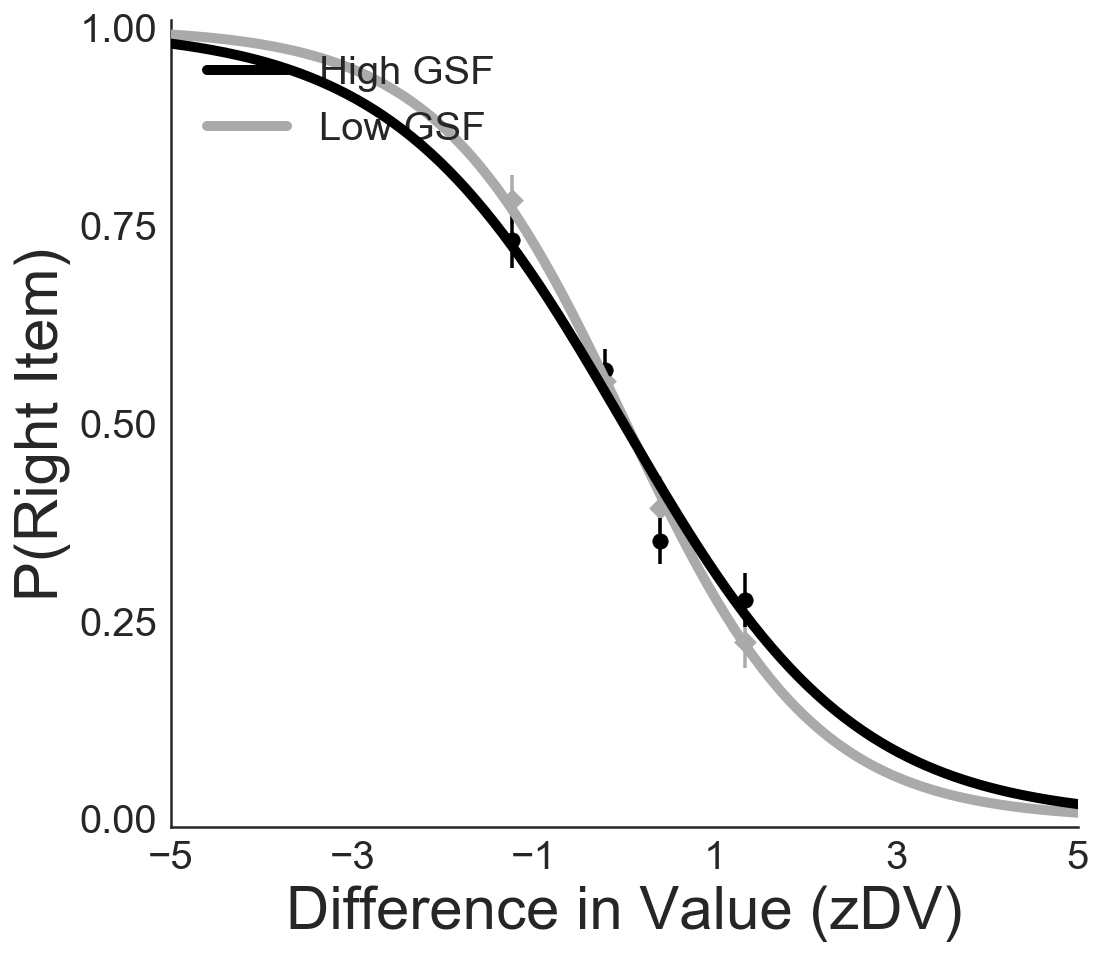

In [45]:
# Split by high/low gaze shift frequency
logisticplot_all('GSFSplit', 'High GSF', 'Low GSF', data=data_expD, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (zDV)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


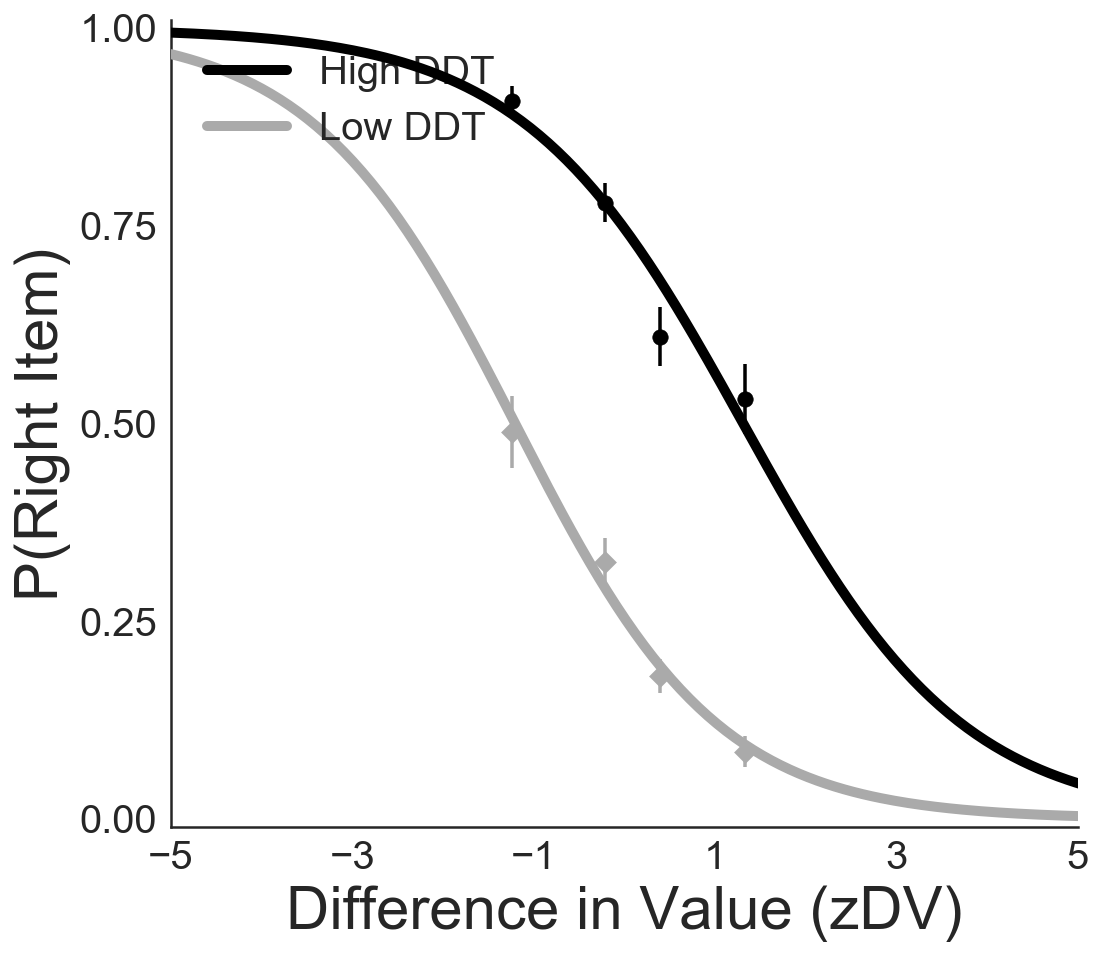

In [46]:
# Split by high/low dwelling time
logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expD, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (zDV)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

<a id='logisticFam'></a>
## Difference in familiarity (DV) is calculated as (Fam_Right  - Fam_Left)

## Like Condition

Low measure coef [[0.29152234]]
High measure coef [[0.79738065]]


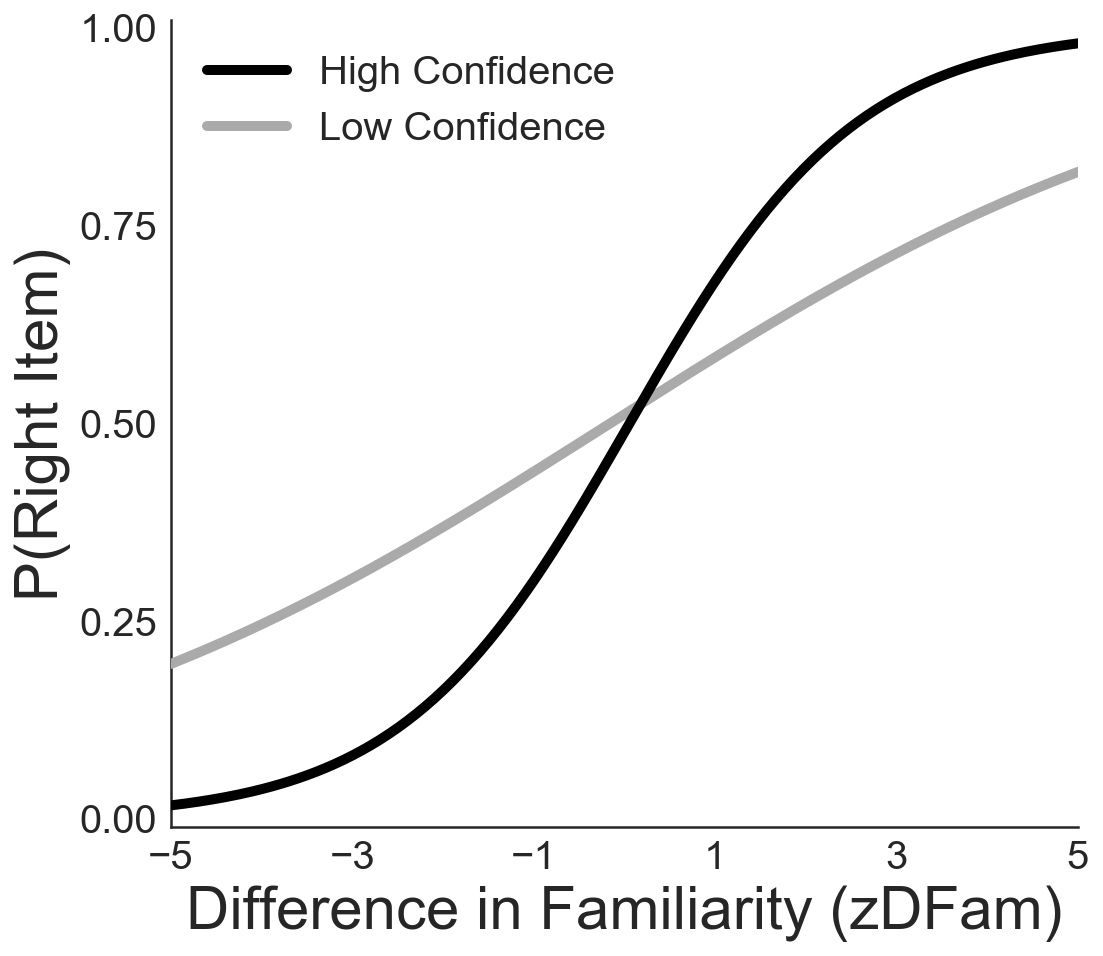

In [47]:
# Split by high/low conf
logisticplot_simpl('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expL, xaxis='zDFam', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Familiarity (zDFam)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

Low measure coef [[0.64136837]]
High measure coef [[0.41364292]]


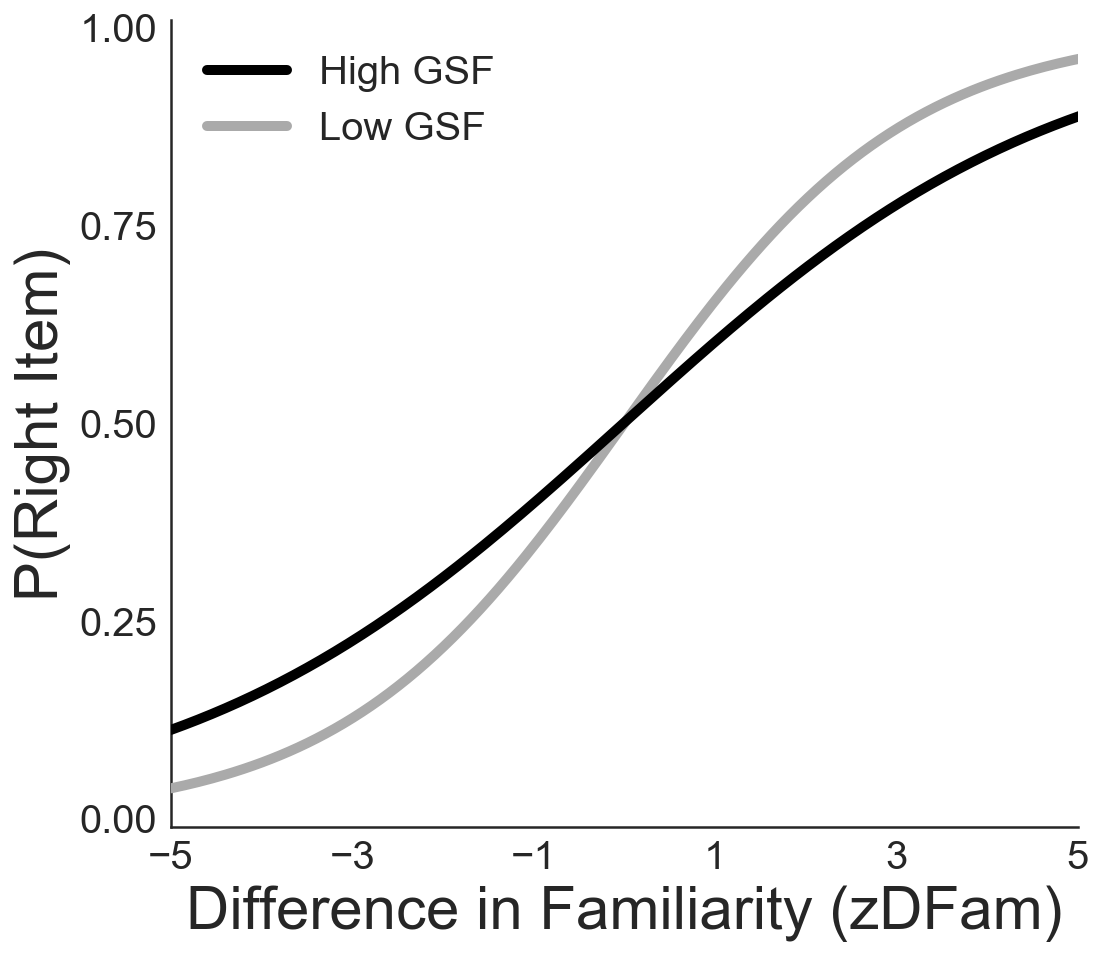

In [48]:
# Split by high/low gaze shift frequency
logisticplot_simpl('GSFSplit', 'High GSF', 'Low GSF', data=data_expL, xaxis='zDFam', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Familiarity (zDFam)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

Low measure coef [[0.60498851]]
High measure coef [[0.65989826]]


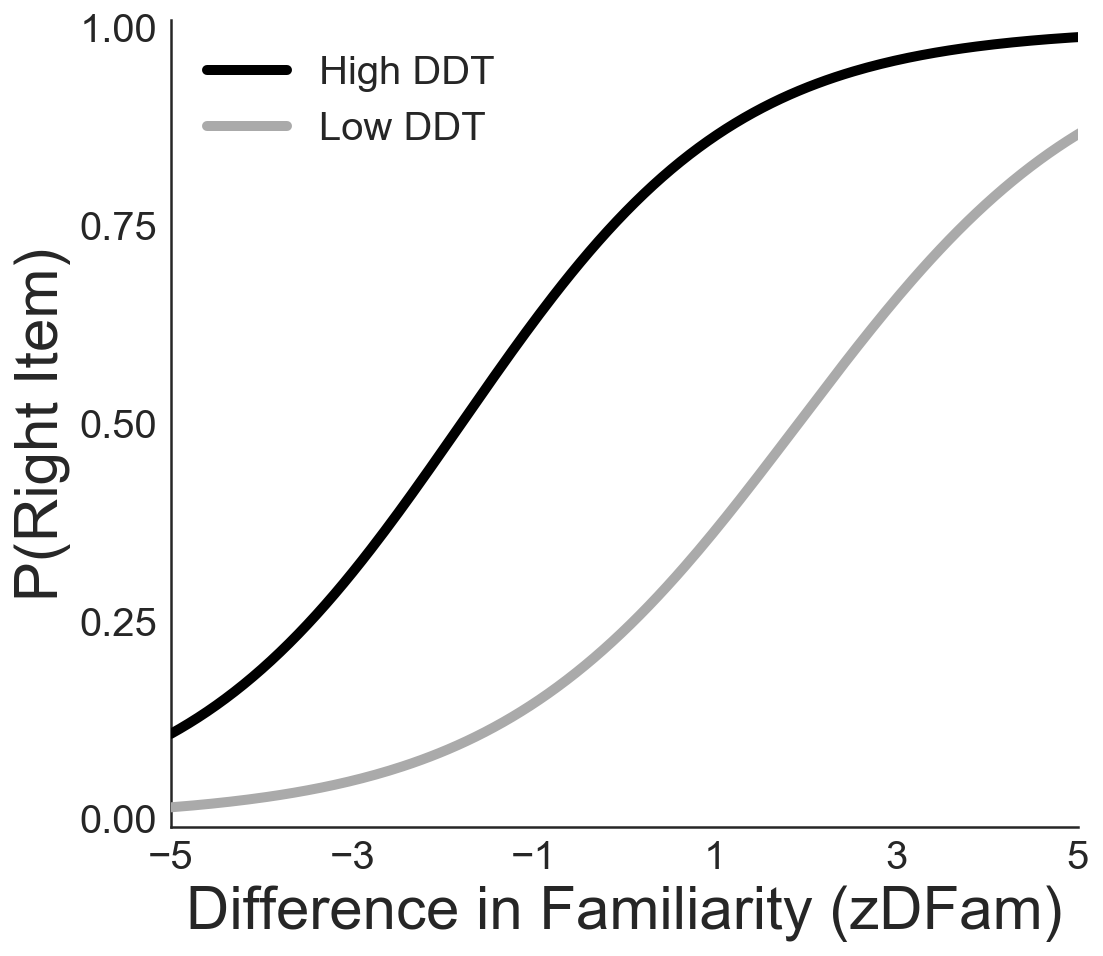

In [49]:
# Split by high/low dwelling time
logisticplot_simpl('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDFam', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Familiarity (zDFam)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

## Dislike Condition

Low measure coef [[-0.38353006]]
High measure coef [[-0.62911586]]


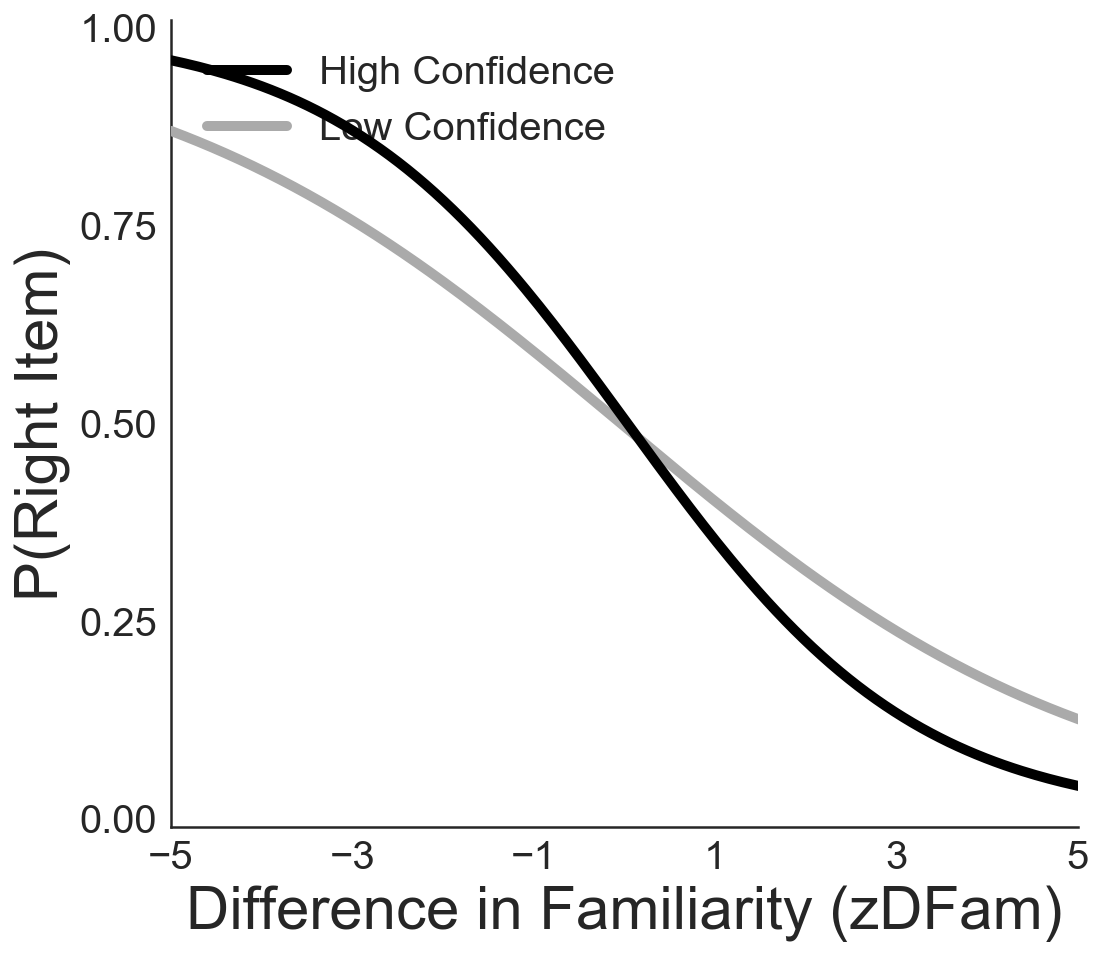

In [50]:
# Split by high/low conf
logisticplot_simpl('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expD, xaxis='zDFam', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Familiarity (zDFam)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

Low measure coef [[-0.62494346]]
High measure coef [[-0.39067773]]


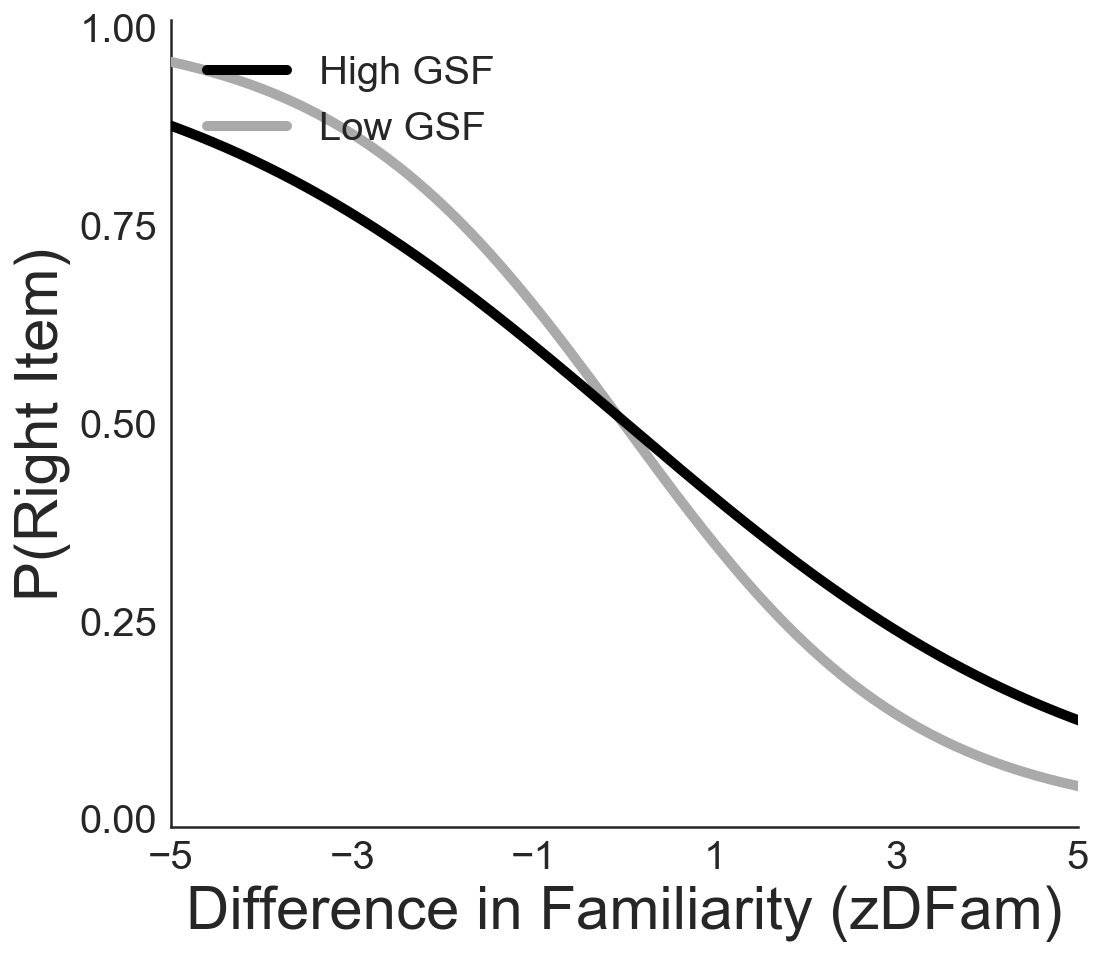

In [51]:
# Split by high/low gaze shift frequency
logisticplot_simpl('GSFSplit', 'High GSF', 'Low GSF', data=data_expD, xaxis='zDFam', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Familiarity (zDFam)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

Low measure coef [[-0.36913821]]
High measure coef [[-0.40596682]]


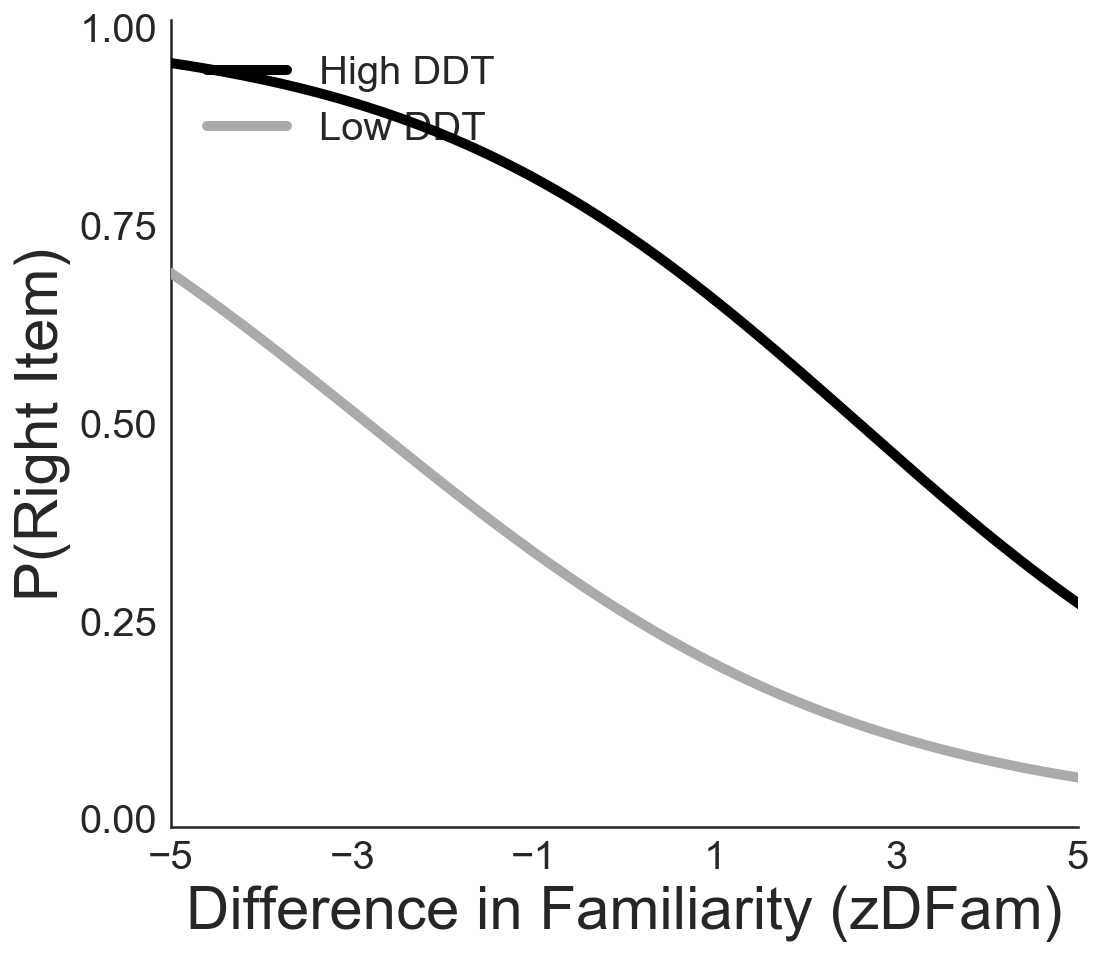

In [52]:
# Split by high/low dwelling time

logisticplot_simpl('DDTSplit', 'High DDT', 'Low DDT', data=data_expD, xaxis='zDFam', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Familiarity (zDFam)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='Part')
plt.tight_layout()

## [Go to Regression plots for Familiarity ](#regressionFam)

## Check differences between Like and Dislike blocks

In [264]:
partic = []
Correct_like = []
Correct_dislike = []
RT_like = []
RT_dislike = []
Conf_like = []
Conf_dislike = []

DDT_like = []
DDT_dislike = []
GSF_like = []
GSF_dislike = []
DFam_like = []
DFam_dislike = []
DVal_like = []
DVal_dislike = []


for i in unique(data_expL["Part"]):
    
    if i== 2 or i ==26 or i==35:
        continue
        
    Correct_lik = data_expL.loc[(data_expL['Part'] == i),'Correct'].sum()/120
    Correct_dislik = data_expD.loc[(data_expD['Part'] == i),'Correct'].sum()/120
    
    RT_lik = data_expL.loc[(data_expL['Part'] == i),'RT'].sum()/120
    RT_dislik = data_expD.loc[(data_expD['Part'] == i),'RT'].sum()/120
    
    Conf_lik = data_expL.loc[(data_expL['Part'] == i),'zConf'].sum()/120
    Conf_dislik = data_expD.loc[(data_expD['Part'] == i),'zConf'].sum()/120

    DDT_lik = data_expL.loc[(data_expL['Part'] == i),'zAbsDDT'].sum()/120
    DDT_dislik = data_expD.loc[(data_expD['Part'] == i),'zAbsDDT'].sum()/120

    GSF_lik = data_expL.loc[(data_expL['Part'] == i),'zGSF'].sum()/120
    GSF_dislik = data_expD.loc[(data_expD['Part'] == i),'zGSF'].sum()/120
    
    Fam_lik = data_expL.loc[(data_expL['Part'] == i),'DFam'].sum()/120
    Fam_dislik = data_expD.loc[(data_expD['Part'] == i),'DFam'].sum()/120
    
    Val_lik = data_expL.loc[(data_expL['Part'] == i),'LVal'].sum()
    Val_dislik = data_expD.loc[(data_expD['Part'] == i),'LVal'].sum()
    

    
    
    
    Correct_like.append(Correct_lik)
    Correct_dislike.append(Correct_dislik)
    RT_like.append(RT_lik)
    RT_dislike.append(RT_dislik)
    Conf_like.append(Conf_lik)
    Conf_dislike.append(Conf_dislik)
    DDT_like.append(DDT_lik)
    DDT_dislike.append(DDT_dislik)
    GSF_like.append(GSF_lik)
    GSF_dislike.append(GSF_dislik)
    DFam_like.append(Fam_lik)
    DFam_dislike.append(Fam_dislik)
    DVal_like.append(Val_lik)
    DVal_dislike.append(Val_dislik)
    partic.append(i)




In [265]:
table_aux= np.column_stack((partic,DVal_like,DVal_dislike))
test_df = pd.DataFrame(table_aux,columns=['part','like','dislike'])
test_df


part   like  dislike
0    1.0  179.7    179.7
1    3.0  135.6    135.6
2    4.0   94.3     94.3
3    5.0   31.9     31.9
4    8.0   86.1     86.1
5    9.0   92.6     92.6
6   10.0  148.5    148.5
7   11.0  199.2    199.2
8   12.0   96.0     96.0
9   13.0  182.7    182.7
10  14.0  141.8    141.8
11  15.0  146.0    146.0
12  16.0  128.7    128.7
13  18.0  194.6    194.6
14  19.0   99.5     99.5
15  20.0   29.6     29.6
16  21.0  134.5    134.5
17  22.0   69.2     69.2
18  23.0  141.6    141.6
19  24.0   91.8     91.8
20  27.0   67.7     67.7
21  28.0  115.1    115.1
22  29.0  117.7    117.7
23  31.0   79.8     79.8
24  32.0  101.9    101.9
25  34.0  191.6    191.6
26  36.0  138.6    138.9
27  37.0  170.2    170.2
28  38.0  165.0    165.0
29  39.0  193.2    193.2

In [266]:
diff = mean(Val_lik) - mean(Val_lik)
s, p = stats.ttest_rel(Correct_like,Correct_dislike)
print (diff)

0.021944444444444433


([<matplotlib.axis.XTick at 0x1a28e45be0>,
 <a list of 2 Text xticklabel objects>)

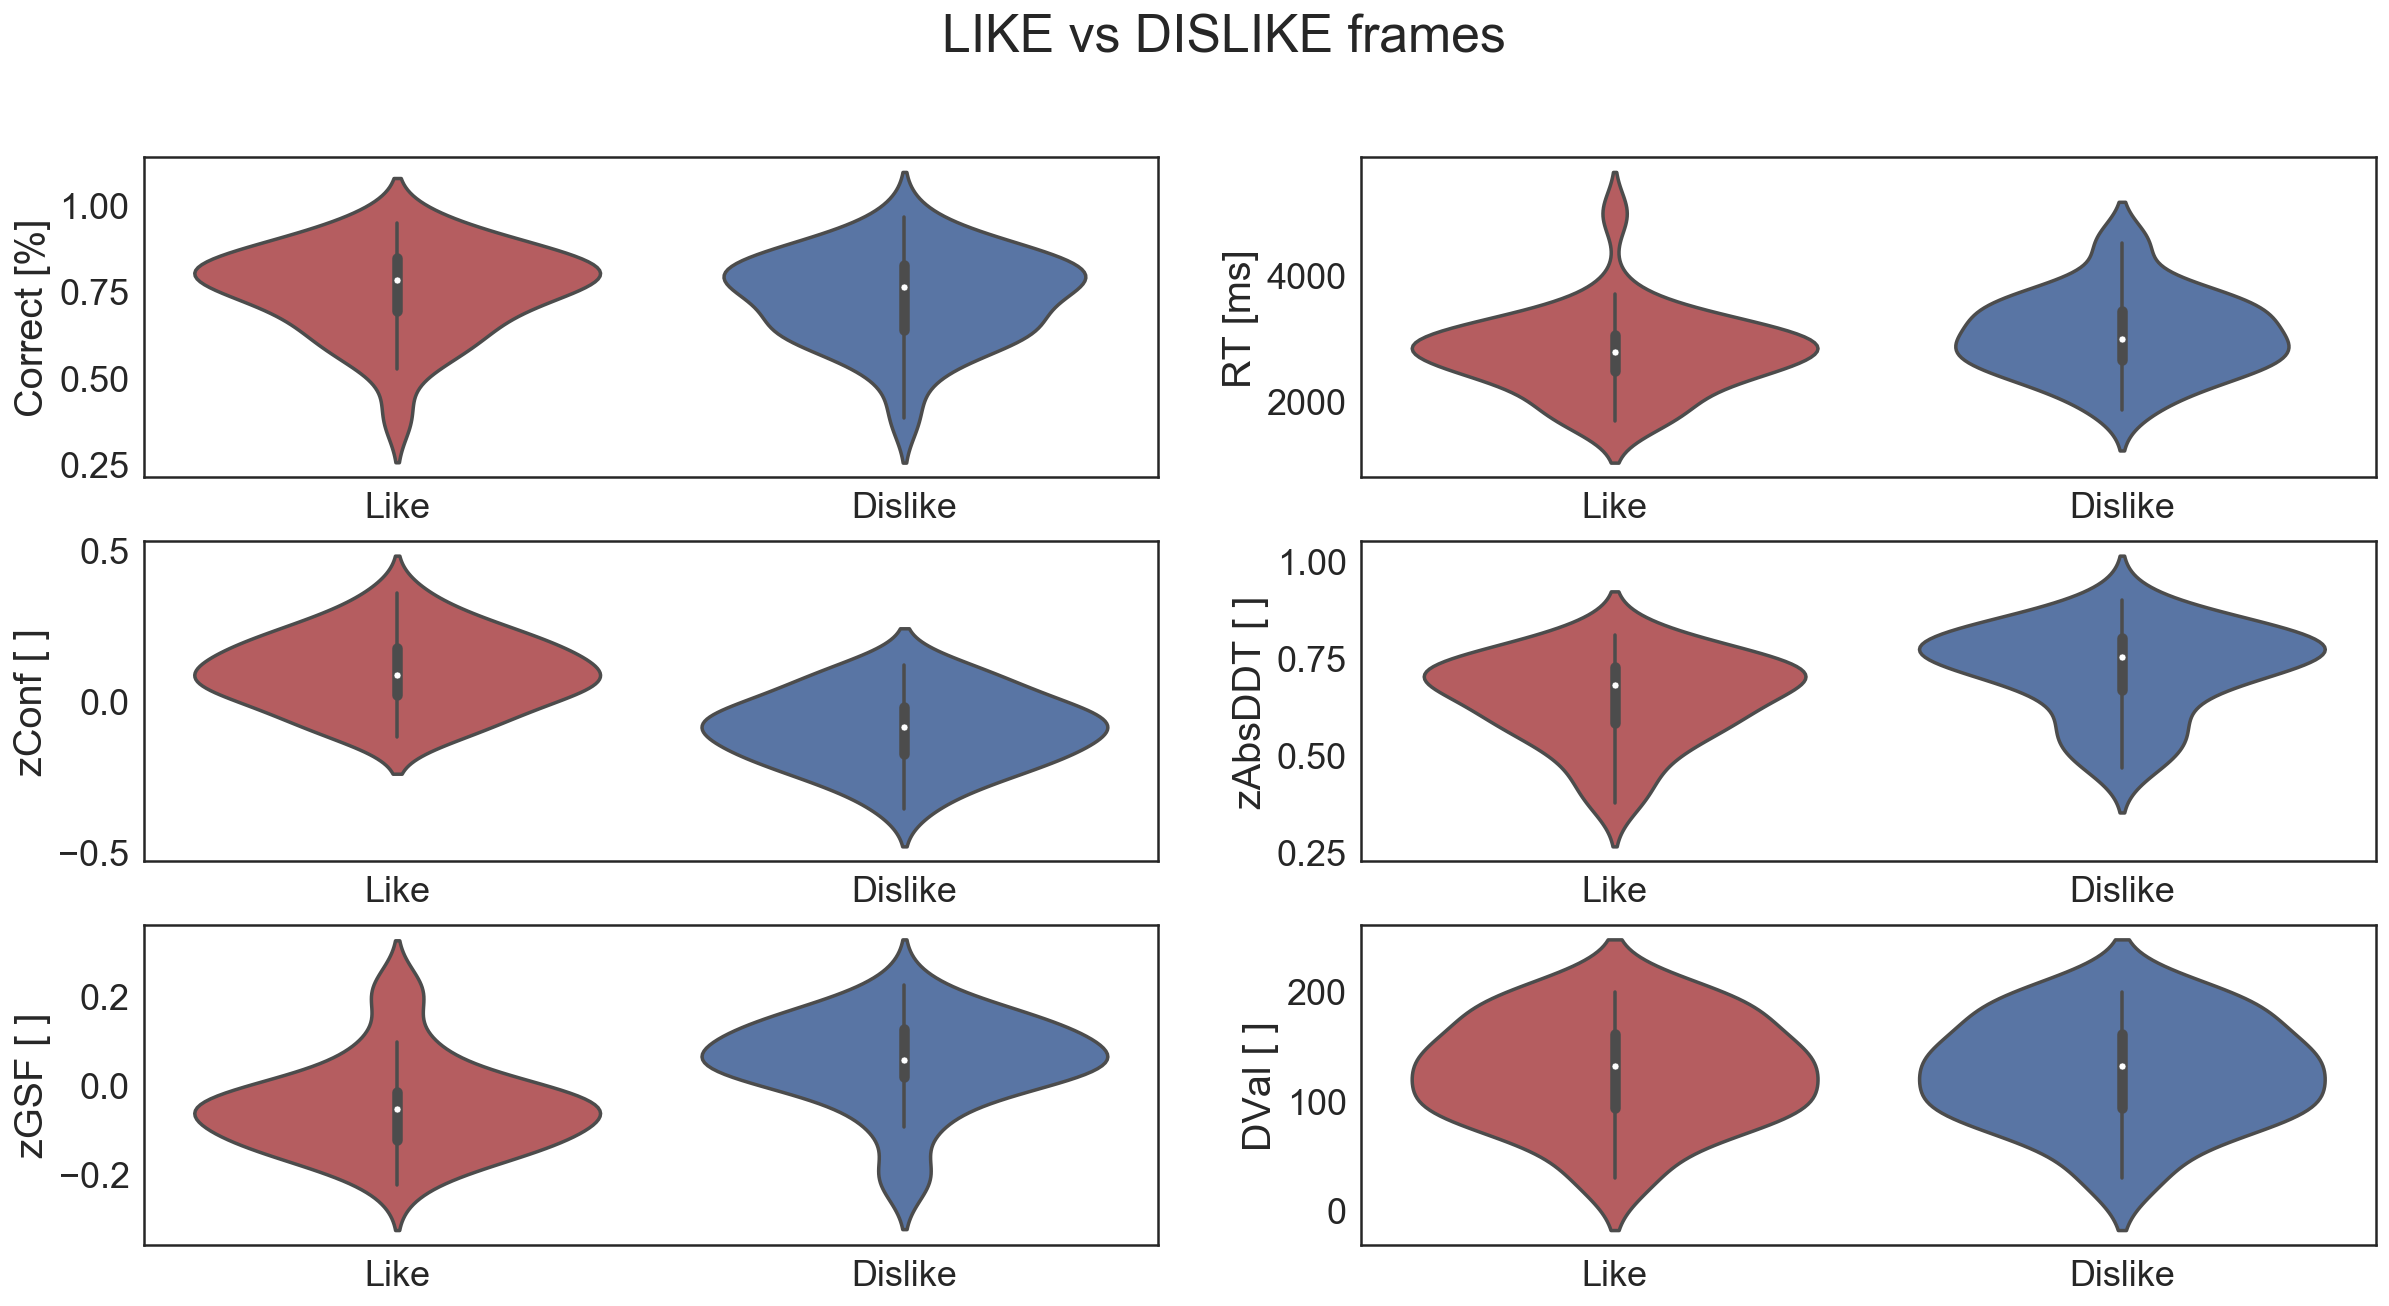

In [267]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
plt.suptitle('LIKE vs DISLIKE frames')

my_pal = {"r" ,"b"}

# FOR CORRECT

plt.subplot(321)

all_arr = [Correct_like,
          Correct_dislike]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='Correct [%]')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# FOR RT
plt.subplot(322)
all_arr1 = [RT_like,
          RT_dislike]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='RT [ms]')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# FOR CONF
plt.subplot(323)
all_arr1 = [Conf_like,
          Conf_dislike]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='zConf [ ]')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# FOR DDT
plt.subplot(324)
all_arr1 = [DDT_like,
          DDT_dislike]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='zAbsDDT [ ]')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# FOR GSF
plt.subplot(325)
all_arr1 = [GSF_like,
          GSF_dislike]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='zGSF [ ]')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# FOR DVal
plt.subplot(326)
all_arr1 = [DVal_like,
          DVal_dislike]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='DVal [ ]')
plt.xticks([0, 1,], ['Like', 'Dislike'])

## # FOR DFam
## plt.subplot(326)
## all_arr1 = [DFam_like,
##           DFam_dislike]
## bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='DFam [ ]')
## plt.xticks([0, 1,], ['Like', 'Dislike'])

<a id='reg'></a>
# 3. Regression Analysis
 

## Loading data in R

In [53]:
%R -i data_exp1
data_exp1

Unnamed: 0  Part  TrialN  PairID                                 LItem  \
0              0     1       1      14                116_boots_caramels.png   
1              1     1       2      44          102_propercorn_worcester.png   
2              2     1       3      51                       59_crunchie.png   
3              3     1       4      12               64_nestle_aero_mint.png   
4              4     1       5       4           44_walkers_french_fries.png   
5              5     1       6      39       50_nakd_rhubarb_and_custard.png   
6              6     1       7      59           54_milkyway_magic_stars.png   
7              7     1       8      16                116_boots_caramels.png   
8              8     1       9       1                  62_cadbury_wispa.png   
9              9     1      10      48           44_walkers_french_fries.png   
10            10     1      11      37                13_fruit_pastilles.png   
11            11     1      12       6     36_nature_valley_protein_bars.png   
12            12     1      13      35         41_jelly_babies_berry_mix.png   
13            13     1      14      45                       51_smarties.png   
14            14     1      15      58                       5_caramello.png   
15            15     1      16      41                   11_lindt_orange.png   
16            16     1      17      42                         63_kitkat.png   
17            17     1      18      52       42_dairy_milk_fruit_and_nut.png   
18            18     1      19      49            52_discos_salt_vinegar.png   
19            19     1      20      33                         26_yorkie.png   
20            20     1      21       7             30_starburst_original.png   
21            21     1      22      38                   56_marshmallows.png   
22            22     1      23      47                       51_smarties.png   
23            23     1      24      34                     19_pistachios.png   
24            24     1      25      15  57_food_doctor_mild_korma_crisps.png   
25            25     1      26       5                113_walkers_cheese.png   
26            26     1      27      46            112_lindt_extra_creamy.png   
27            27     1      28      50                         63_kitkat.png   
28            28     1      29      43                    103_nakd_berry.png   
29            29     1      30      11                     18_galaxy_bar.png   
...          ...   ...     ...     ...                                   ...   
9330        9330    39     211      45                   56_marshmallows.png   
9331        9331    39     212      46                    40_nestle_rolo.png   
9332        9332    39     213      43           15_jacobs_mini_cheddars.png   
9333        9333    39     214      16                    48_mentos_mint.png   
9334        9334    39     215      30                       32_snickers.png   
9335        9335    39     216      37                    40_nestle_rolo.png   
9336        9336    39     217      38                      45_gb_ginger.png   
9337        9337    39     218      49        111_propercorn_sweetnsalty.png   
9338        9338    39     219      48                    110_bombay_mix.png   
9339        9339    39     220      31     53_eat_natural_almond_apricot.png   
9340        9340    39     221      26                     29_mms_peanut.png   
9341        9341    39     222      40            60_caramel_rice_crisps.png   
9342        9342    39     223      24                117_yogurt_raisins.png   
9343        9343    39     224      53                  107_graze_scream.png   
9344        9344    39     225      41                       39_milkyway.png   
9345        9345    39     226      20            10_hula_hoops_bbq_beef.png   
9346        9346    39     227      29             115_shapers_blueberry.png   
9347        9347    39     228      50           44_walkers_french_fries.png   
9348  

In [54]:
%%R
##Change Column name for better regression presentation
#colnames(data_exp1)[which(names(data_exp1) == "zChoiceRT")] <- "zRT"
#colnames(data_exp1)[which(names(data_exp1) == "ChoiceRT")] <- "RT"


NULL


In [55]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(data_exp1$BlockCond=='1'), ]
data_exp1_DisLike <- data_exp1[ which(data_exp1$BlockCond=='2'), ]

<a id='regCond'></a>
# 3.1.  Regressions per Condition (Like/Dislike)
## ChoiceITM regression

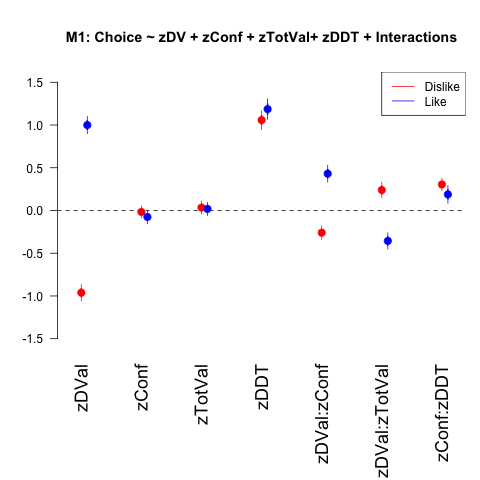

In [58]:
%%R
# Figure replicating Folke 2016.

title_plot = "M1: Choice ~ zDV + zConf + zTotVal+ zDDT + Interactions"

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDVal:zTotVal + zDDT + zConf:zDDT, data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDVal:zTotVal + zDDT + zConf:zDDT, data=data_exp1_DisLike, family=binomial(link="logit"))

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1.5, 1.5) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

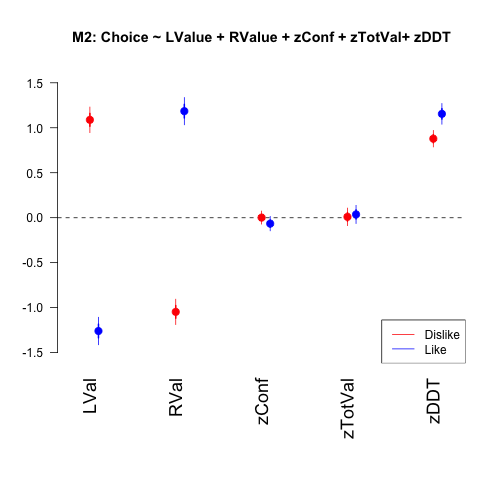

In [59]:
%%R
title_plot = ("M2: Choice ~ LValue + RValue + zConf + zTotVal+ zDDT")

ModelChoiceL_3 <- glm(Choice ~ LVal + RVal + zConf + zTotVal+ zDDT , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_3 <- glm(Choice ~ LVal + RVal + zConf + zTotVal + zDDT , data=data_exp1_DisLike, family=binomial(link="logit"))

#print(summary(ModelChoiceL_3))

coefplot(ModelChoiceD_3,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1.5, 1.5) ,main=title_plot)
coefplot(ModelChoiceL_3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

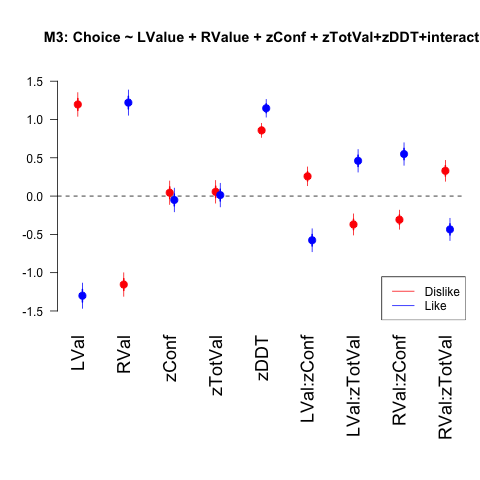

In [60]:
%%R

title_plot = ("M3: Choice ~ LValue + RValue + zConf + zTotVal+zDDT+interact")

ModelChoiceL_4 <- glm(Choice ~ LVal + RVal + zConf + zTotVal+ zDDT + LVal:zConf + LVal:zTotVal + RVal:zConf + RVal:zTotVal, data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_4 <- glm(Choice ~ LVal + RVal + zConf + zTotVal + zDDT + LVal:zConf + LVal:zTotVal + RVal:zConf + RVal:zTotVal, data=data_exp1_DisLike, family=binomial(link="logit"))

coefplot(ModelChoiceD_4,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(10,4,5,1) ,ylim=c(-1.5, 1.5) ,main=title_plot)
coefplot(ModelChoiceL_4, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(10,4,5,1))
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

### Confidence regression

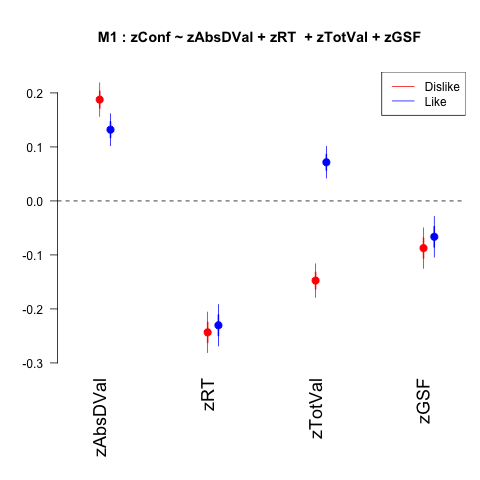

In [61]:
%%R
# Figure replicating Folke 2016. 
title_plot = ("M1 : zConf ~ zAbsDVal + zRT  + zTotVal + zGSF ")

ModelConfidenceL_1 <- glm(zConf ~ zAbsDVal + zRT  + zTotVal + zGSF , data=data_exp1_Like)
ModelConfidenceD_1 <- glm(zConf ~ zAbsDVal + zRT + zTotVal + zGSF , data=data_exp1_DisLike)

#summary(logitMod_FF2017)
#summary(logitModLike_FF2017)
#summary(logitModUnlike_FF2017)

coefplot(ModelConfidenceD_1,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

ValCh: Value Chosen Item 

ValUnCh: Value Unchosen Item

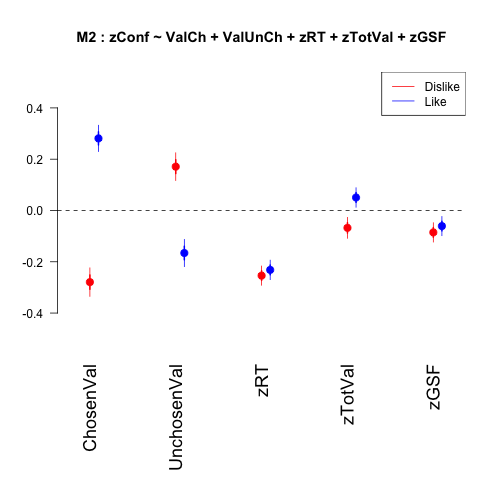

In [62]:
%%R

#title
title_plot = ("M2 : zConf ~ ValCh + ValUnCh + zRT + zTotVal + zGSF")

ModelConfidenceL_2 <- glm(zConf ~  ChosenVal + UnchosenVal + zRT + zTotVal + zGSF, data=data_exp1_Like)
ModelConfidenceD_2 <- glm(zConf ~  ChosenVal + UnchosenVal + zRT + zTotVal + zGSF, data=data_exp1_DisLike)

coefplot(ModelConfidenceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-.5, .5) ,main=title_plot)
coefplot(ModelConfidenceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='regPart'></a>
# 3.2. Generate regression plots for condition and individual participants 
## ChoiceITM~ BehavioralParams + DDT

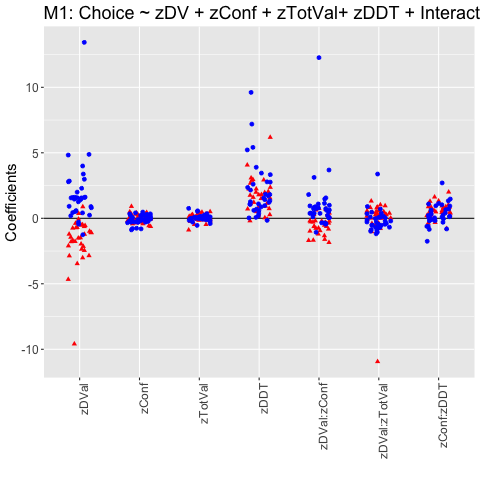

In [65]:
%%R
#Run for all the participants

#Define number of regressors to use
numCol = 7
# Extract values for LIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)

for (i in unique(data_exp1_Like[,"Part"])){
    data_rgrs_subj  <- data_exp1_Like[ which(data_exp1_Like$Part==i), ]
    rsults <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDVal:zTotVal + zDDT + zConf:zDDT, data=data_rgrs_subj, family=binomial(link="logit"))
    # To avoid plotting the intercept
    partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameLike <- data.frame(partCoefs)

#extract the name of the coefficients
a <- names (rsults$coefficients)

#replace names for coefficients in dataframe
for (j in 2: length(a)){
    colnames(CoefsDataFrameLike)[j-1] <- a[j]
}
CoefsDataFrameLike

#print(rsults)
#print(CoefsDataFrameLike)

# Extract values for DISLIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_DisLike[,"Part"])){
    data_rgrs_subj  <- data_exp1_DisLike[ which(data_exp1_DisLike$Part==i), ]
    rsults <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDVal:zTotVal + zDDT + zConf:zDDT, data=data_rgrs_subj, family=binomial(link="logit"))
    # To avoid plotting the intercept
    partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}
#transform coefficiencts by participant vector to dataframe
CoefsDataFrameDislike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
    colnames(CoefsDataFrameDislike)[j-1] <- a[j]
}

CoefsDataFrameDislike

jitter <- position_jitter(width = 0.2)
plot2 <- ggplot()  + geom_hline(yintercept = 0) + 
      geom_point(data = melt(CoefsDataFrameDislike),aes(x=variable, y=value), shape = 17, color='red', position = jitter) +
      geom_point(data = melt(CoefsDataFrameLike), aes(x=variable, y=value),color='blue', position = jitter) + labs(x = "", y = "Coefficients") +
      ggtitle("M1: Choice ~ zDV + zConf + zTotVal+ zDDT + Interactions") + theme(legend.position="Top",text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))



#save as an image
#ggsave("Output/Choice_Reg_Participant.tiff", units="in", width=6, height=4, dpi=300, compression = 'lzw')
plot2

## Confidence ~ BehavParams + GSF

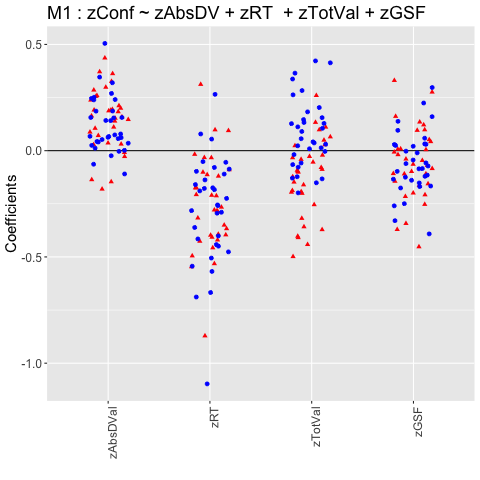

In [66]:
%%R
#Generate regression plots for individual participants 

#Run for all the participants
numCol = 4
# Extract values for LIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_Like[,"Part"])){
data_rgrs_subj  <- data_exp1_Like[ which(data_exp1_Like$Part==i), ]
rsults <- glm(zConf ~ zAbsDVal + zRT  + zTotVal + zGSF, data=data_rgrs_subj)
#print(summary(rsults)$coefficients )
partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameLike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
colnames(CoefsDataFrameLike)[j-1] <- a[j]
}
CoefsDataFrameLike

#print(rsults)
#print(CoefsDataFrameLike)



# Extract values for DISLIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_DisLike[,"Part"])){
data_rgrs_subj  <- data_exp1_DisLike[ which(data_exp1_DisLike$Part==i), ]
rsults <- glm(zConf ~ zAbsDVal + zRT  + zTotVal + zGSF, data=data_rgrs_subj)
#print(summary(rsults)$coefficients )
partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}
#transform coefficiencts by participant vector to dataframe
CoefsDataFrameDislike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
colnames(CoefsDataFrameDislike)[j-1] <- a[j]
}
CoefsDataFrameDislike

jitter <- position_jitter(width = 0.2)
plot2 <- ggplot()  + geom_hline(yintercept = 0) + 
      geom_point(data = melt(CoefsDataFrameDislike),aes(x=variable, y=value), shape = 17, color='red', position = jitter) +
      geom_point(data = melt(CoefsDataFrameLike), aes(x=variable, y=value),color='blue', position = jitter) + labs(x = "", y = "Coefficients") +
      ggtitle("M1 : zConf ~ zAbsDV + zRT  + zTotVal + zGSF") + theme(legend.position="Top",text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))
      
#ggsave("Output/Confidence_Reg_Participant.tiff", units="in", width=5, height=4, dpi=300, compression = 'lzw')

plot2


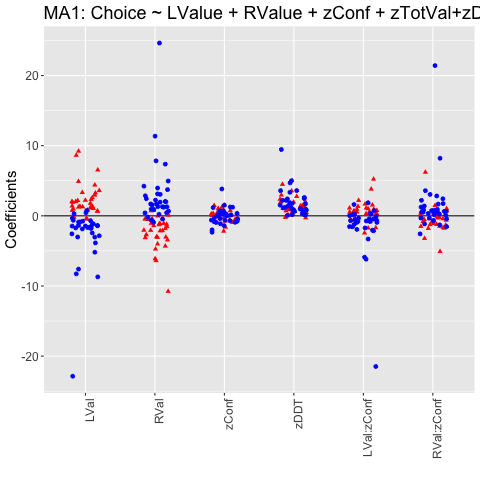

In [67]:
%%R
#Run for all the participants

#Define number of regressors to use
numCol = 6
# Extract values for LIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)

for (i in unique(data_exp1_Like[,"Part"])){
    data_rgrs_subj  <- data_exp1_Like[ which(data_exp1_Like$Part==i), ]
    rsults <- glm(Choice ~ LVal + RVal + zConf + zDDT + LVal:zConf  + RVal:zConf  , data=data_rgrs_subj, family=binomial(link="logit"))
    # To avoid plotting the intercept
    partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])   
   #print (rsults)
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameLike <- data.frame(partCoefs)

#extract the name of the coefficients
a <- names (rsults$coefficients)

#replace names for coefficients in dataframe
for (j in 2: length(a)){
    colnames(CoefsDataFrameLike)[j-1] <- a[j]
}
CoefsDataFrameLike

# Extract values for DISLIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_DisLike[,"Part"])){
    data_rgrs_subj  <- data_exp1_DisLike[ which(data_exp1_DisLike$Part==i), ]
    rsults <- glm(Choice ~ LVal + RVal + zConf + zDDT + LVal:zConf  + RVal:zConf, data=data_rgrs_subj, family=binomial(link="logit"))
    # To avoid plotting the intercept
    partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameDislike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)

#replace names for coefficients in dataframe
for (j in 2: length (a)){
    colnames(CoefsDataFrameDislike)[j-1] <- a[j]
}

CoefsDataFrameDislike

jitter <- position_jitter(width = 0.2)
plot2 <- ggplot()  + geom_hline(yintercept = 0) + 
      geom_point(data = melt(CoefsDataFrameDislike),aes(x=variable, y=value), shape = 17, color='red', position = jitter) +
      geom_point(data = melt(CoefsDataFrameLike), aes(x=variable, y=value),color='blue', position = jitter) + labs(x = "", y = "Coefficients") +
      ggtitle("MA1: Choice ~ LValue + RValue + zConf + zTotVal+zDDT+interactions") + theme(legend.position="Top",text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

#save as an image
#ggsave("Output/Choice_Reg_Participant.tiff", units="in", width=6, height=4, dpi=300, compression = 'lzw')
plot2


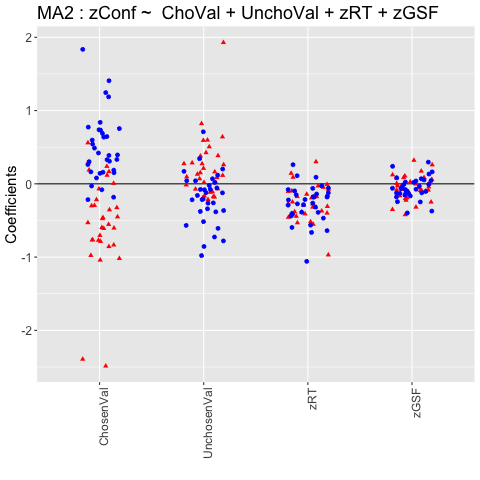

In [71]:
%%R
#Generate regression plots for individual participants 

#Run for all the participants
#Select the number of columns that correspond to actual parameter if not the matrix (and the figure) will include the values for the std errors
numCol = 4
# Extract values for LIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_Like[,"Part"])){
data_rgrs_subj  <- data_exp1_Like[ which(data_exp1_Like$Part==i), ]
rsults <- glm(zConf ~  ChosenVal + UnchosenVal + zRT + zGSF, data=data_rgrs_subj)
#print(summary(rsults)$coefficients )
partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameLike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
colnames(CoefsDataFrameLike)[j-1] <- a[j]
}
CoefsDataFrameLike

#print(rsults)
#print(CoefsDataFrameLike)

# Extract values for DISLIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_DisLike[,"Part"])){
data_rgrs_subj  <- data_exp1_DisLike[ which(data_exp1_DisLike$Part==i), ]
rsults <- glm(zConf ~   ChosenVal + UnchosenVal  + zRT + zGSF, data=data_rgrs_subj)
#print(summary(rsults)$coefficients )
partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}
#transform coefficiencts by participant vector to dataframe
CoefsDataFrameDislike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
colnames(CoefsDataFrameDislike)[j-1] <- a[j]
}
CoefsDataFrameDislike

jitter <- position_jitter(width = 0.2)
plot2 <- ggplot()  + geom_hline(yintercept = 0) + 
      geom_point(data = melt(CoefsDataFrameDislike),aes(x=variable, y=value), shape = 17, color='red', position = jitter) +
      geom_point(data = melt(CoefsDataFrameLike), aes(x=variable, y=value),color='blue', position = jitter) + labs(x = "", y = "Coefficients") +
      ggtitle("MA2 : zConf ~  ChoVal + UnchoVal + zRT + zGSF") + theme(legend.position="Top",text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))
      
#ggsave("Output/Confidence_Reg_Participant.tiff", units="in", width=5, height=4, dpi=300, compression = 'lzw')

plot2


<a id='regressionFam'></a>
# 3.3. Familiarity regressions

<a id='ChoiceregressionFam'></a>
## 3.3.1 Choice regressions

[1] "Like BIC:"
[1] 4462.218
[1] "DisLike BIC:"
[1] 4839.359


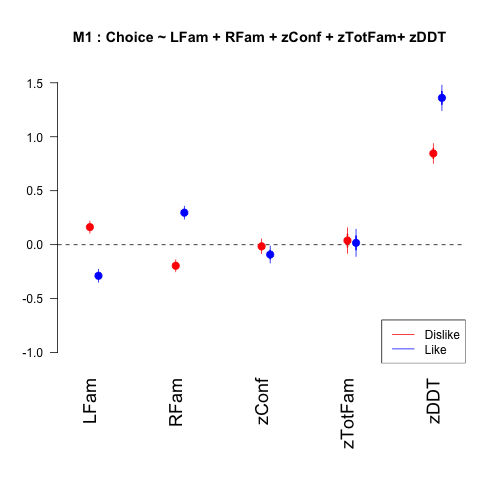

In [72]:
%%R

#attach(mtcars)
#layout(matrix(c(1,2), 1, 1, byrow = FALSE), widths=c(5,5), heights=c(5,5))

# regression for choice and familiarity
title_plot = "M1 : Choice ~ LFam + RFam + zConf + zTotFam+ zDDT "

ModelChoiceL_Fam1 <- glm(Choice ~ LFam + RFam + zConf + zTotFam+ zDDT , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_Fam1 <- glm(Choice ~ LFam + RFam + zConf + zTotFam+ zDDT, data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_Fam1)
BIC2 = BIC(ModelChoiceD_Fam1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_Fam1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1.0, 1.5) ,main=title_plot)
coefplot(ModelChoiceL_Fam1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 4431.176
[1] "DisLike BIC:"
[1] 4832.56


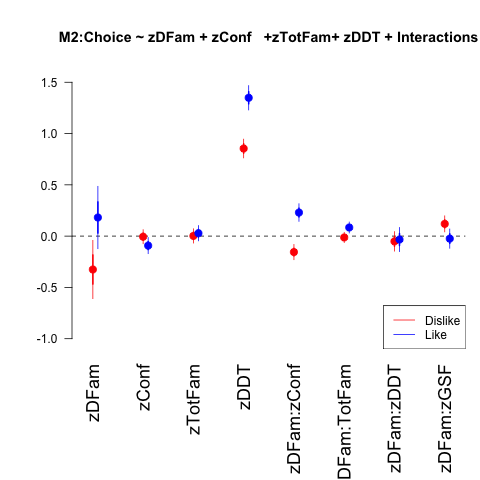

In [73]:
%%R
#regression for confidence and familiarity
title_plot = ("M2:Choice ~ zDFam + zConf   +zTotFam+ zDDT + Interactions")
ModelChoiceL_Fam2 <- glm(Choice ~ zDFam + zConf   +zTotFam+ zDDT + zDFam:zConf + zDFam:TotFam + zDFam:zDDT + zDFam:zGSF, data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_Fam2 <- glm(Choice ~ zDFam + zConf   +zTotFam+ zDDT + zDFam:zConf + zDFam:TotFam + zDFam:zDDT + zDFam:zGSF, data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_Fam2)
BIC2 = BIC(ModelChoiceD_Fam2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_Fam2,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,5,5,1), ylim=c(-1.0, 1.5), main=title_plot)
coefplot(ModelChoiceL_Fam2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='ConfregressionFam'></a>
## 3.3.2 Confidence regressions

[1] "Like BIC:"
[1] 10437.56
[1] "DisLike BIC:"
[1] 11054.84


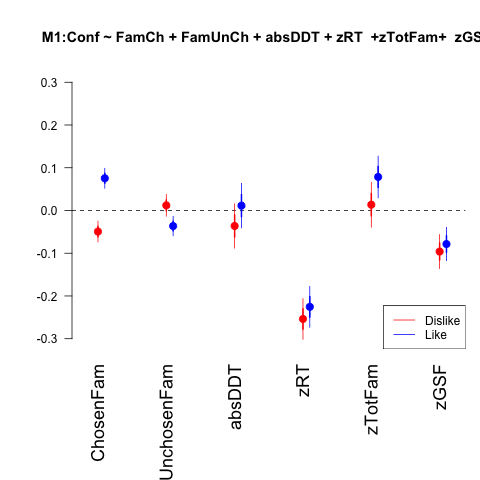

In [74]:
%%R
#regression for confidence and familiarity
title_plot = ("M1:Conf ~ FamCh + FamUnCh + absDDT + zRT  +zTotFam+  zGSF ")

ModelConfidenceL_M1 <- glm(zConf ~ ChosenFam + UnchosenFam + absDDT + zRT  +zTotFam+  zGSF  , data=data_exp1_Like)
ModelConfidenceD_M1 <- glm(zConf ~ ChosenFam + UnchosenFam + absDDT + zRT  +zTotFam+  zGSF , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_M1)
BIC2 = BIC(ModelConfidenceD_M1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_M1,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,5,5,1), ylim=c(-0.3, 0.3), main=title_plot)
coefplot(ModelConfidenceL_M1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10482.5
[1] "DisLike BIC:"
[1] 11067.24


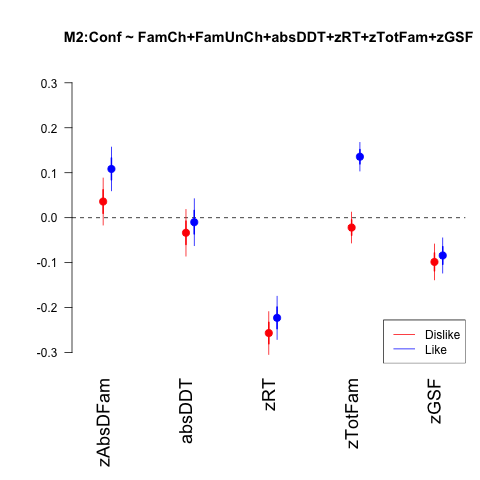

In [75]:
%%R
#regression for confidence and familiarity
title_plot = ("M2:Conf ~ FamCh+FamUnCh+absDDT+zRT+zTotFam+zGSF")

ModelConfidenceL_M2 <- glm(zConf ~ zAbsDFam + absDDT + zRT  +zTotFam+  zGSF  , data=data_exp1_Like)
ModelConfidenceD_M2 <- glm(zConf ~ zAbsDFam  + absDDT + zRT  +zTotFam+  zGSF , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_M2)
BIC2 = BIC(ModelConfidenceD_M2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_M2,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,5,5,1), ylim=c(-0.3, 0.3), main=title_plot)
coefplot(ModelConfidenceL_M2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='VplusFregressionFam'></a>
## 3.3.3. Value + Familiarity regressions

[1] "Like BIC:"
[1] 3959.443
[1] "DisLike BIC:"
[1] 4364.741


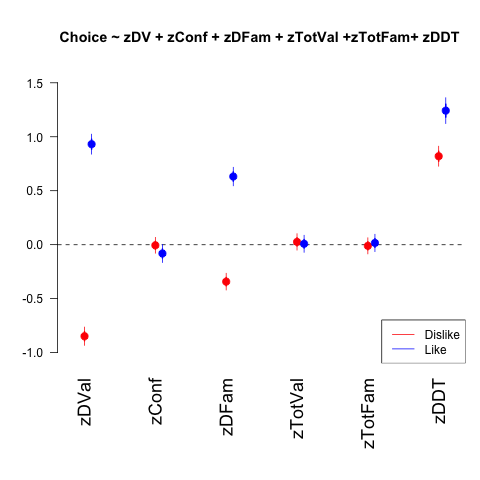

In [78]:
%%R
# regression for choice and familiarity
title_plot = "Choice ~ zDV + zConf + zDFam + zTotVal +zTotFam+ zDDT "

ModelChoiceL_2 <- glm(Choice ~ zDVal + zConf + zDFam + zTotVal +zTotFam+ zDDT , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_2 <- glm(Choice ~ zDVal + zConf + zDFam + zTotVal+ zTotFam+ zDDT, data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_2)
BIC2 = BIC(ModelChoiceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1.0, 1.5) ,main=title_plot)
coefplot(ModelChoiceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10383.95
[1] "DisLike BIC:"
[1] 10898.1


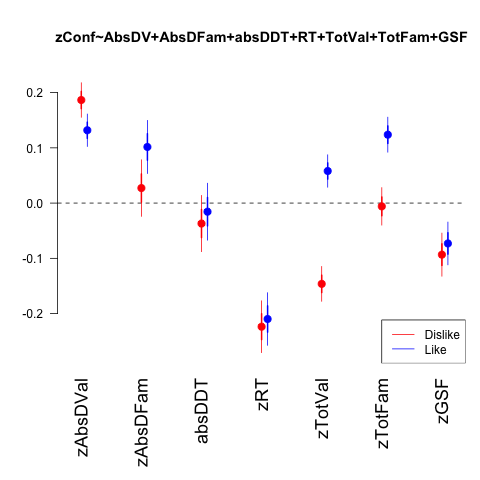

In [79]:
%%R
#regression for confidence and familiarity
title_plot = ("zConf~AbsDV+AbsDFam+absDDT+RT+TotVal+TotFam+GSF")

ModelConfidenceL_M3 <- glm(zConf ~ zAbsDVal + zAbsDFam + absDDT + zRT  + zTotVal +zTotFam+  zGSF , data=data_exp1_Like)
ModelConfidenceD_M3 <- glm(zConf ~ zAbsDVal  +zAbsDFam + absDDT + zRT + zTotVal +zTotFam+ zGSF, data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_M3)
BIC2 = BIC(ModelConfidenceD_M3)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_M3,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_M3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='ChoicFactregressionFam'></a>
## 3.3.4. Choice factors familiarity regressions

[1] "Like BIC:"
[1] 11177.9
[1] "DisLike BIC:"
[1] 11202.44


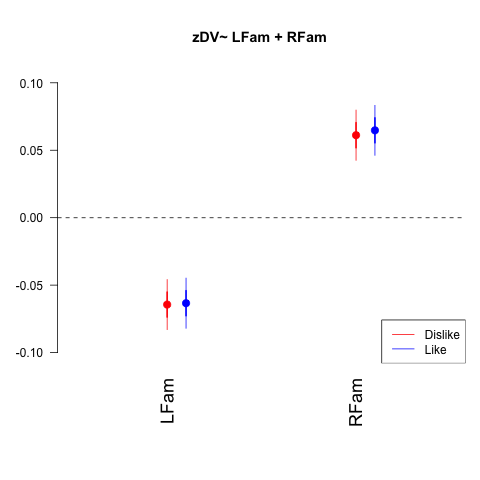

In [102]:
%%R
#regression for confidence and familiarity
title_plot = ("zDVal~ LFam + RFam ")

ModelConfidenceL_M3 <- glm(zDVal~ LFam + RFam  , data=data_exp1_Like)
ModelConfidenceD_M3 <- glm(zDVal~ LFam + RFam , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_M3)
BIC2 = BIC(ModelConfidenceD_M3)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_M3,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1), ylim=c(-0.1, 0.1),main=title_plot)
coefplot(ModelConfidenceL_M3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10736.15
[1] "DisLike BIC:"
[1] 11470.76


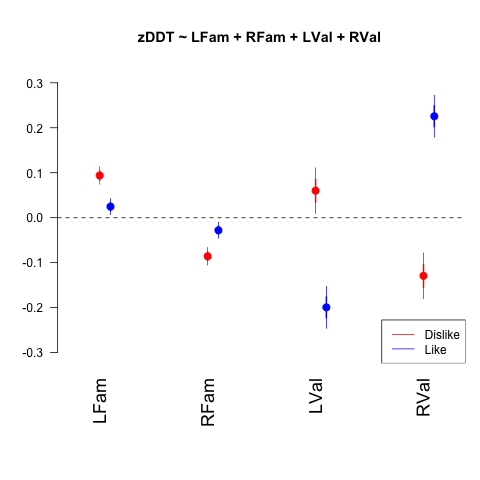

In [82]:
%%R
#regression for confidence and familiarity
title_plot = ("zDDT ~ LFam + RFam + LVal + RVal ")

ModelConfidenceL_M3 <- glm(zDDT ~ LFam + RFam + LVal + RVal, data=data_exp1_Like)
ModelConfidenceD_M3 <- glm(zDDT ~ LFam + RFam + LVal + RVal, data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_M3)
BIC2 = BIC(ModelConfidenceD_M3)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_M3,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1), ylim=c(-0.3, 0.3),main=title_plot)
coefplot(ModelConfidenceL_M3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10810.42
[1] "DisLike BIC:"
[1] 11567.2


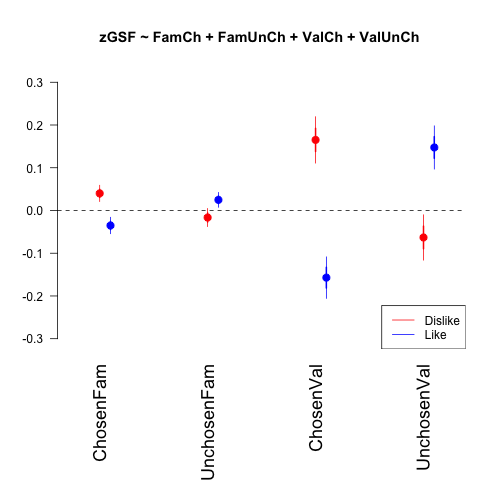

In [84]:
%%R
#regression for confidence and familiarity
title_plot = ("zGSF ~ FamCh + FamUnCh + ValCh + ValUnCh ")

ModelConfidenceL_M3 <- glm(zGSF ~ ChosenFam + UnchosenFam + ChosenVal + UnchosenVal, data=data_exp1_Like)
ModelConfidenceD_M3 <- glm(zGSF ~ ChosenFam + UnchosenFam + ChosenVal + UnchosenVal, data=data_exp1_DisLike)

#ModelConfidenceL_M3 <- glm(zGSF ~ abszDFam  + absDV, data=data_exp1_Like)
#ModelConfidenceD_M3 <- glm(zGSF ~ abszDFam  + absDV, data=data_exp1_DisLike)



BIC1 = BIC(ModelConfidenceL_M3)
BIC2 = BIC(ModelConfidenceD_M3)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_M3,intercept=FALSE, vertical = FALSE, col.pts="red" , cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1), ylim=c(-0.3, 0.3),main=title_plot)
coefplot(ModelConfidenceL_M3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='RequestregressionFam'></a>
## 3.3.5 BdM Familiarity-Value requested regressions

[1] "Like BIC:"
[1] 3952.826
[1] "DisLike BIC:"
[1] 4355.757


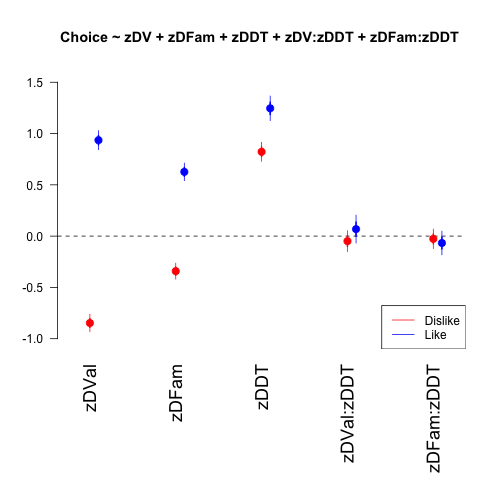

In [86]:
%%R
# regression for choice and familiarity
title_plot = "Choice ~ zDV + zDFam + zDDT + zDV:zDDT + zDFam:zDDT "

ModelChoiceL_2 <- glm(Choice ~ zDVal + zDFam + zDDT + zDVal:zDDT + zDFam:zDDT, data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_2 <- glm(Choice ~ zDVal + zDFam + zDDT + zDVal:zDDT + zDFam:zDDT, data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_2)
BIC2 = BIC(ModelChoiceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1.0, 1.5) ,main=title_plot)
coefplot(ModelChoiceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 4455.489
[1] "DisLike BIC:"
[1] 4695.908


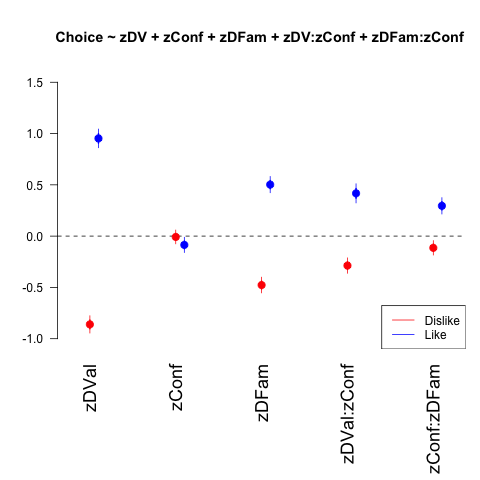

In [88]:
%%R
# regression for choice and familiarity
title_plot = "Choice ~ zDV + zConf + zDFam + zDV:zConf + zDFam:zConf "

ModelChoiceL_2 <- glm(Choice ~ zDVal + zConf + zDFam + zDVal:zConf + zDFam:zConf, data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_2 <- glm(Choice ~ zDVal + zConf + zDFam + zDVal:zConf + zDFam:zConf, data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_2)
BIC2 = BIC(ModelChoiceD_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1.0, 1.5) ,main=title_plot)
coefplot(ModelChoiceL_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10446.42
[1] "DisLike BIC:"
[1] 11061.74


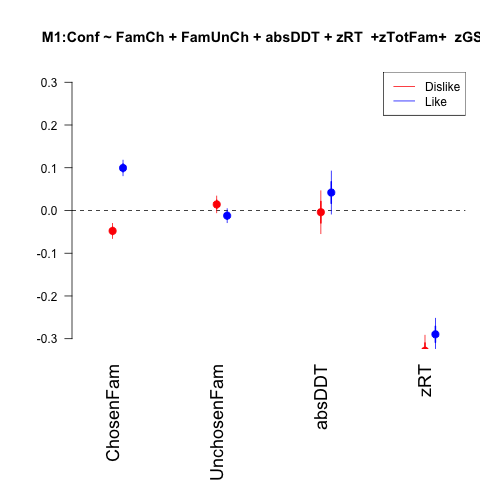

In [89]:
%%R
#regression for confidence and familiarity
title_plot = ("M1:Conf ~ FamCh + FamUnCh + absDDT + zRT  +zTotFam+  zGSF ")

ModelConfidenceL_M1 <- glm(zConf ~ ChosenFam + UnchosenFam + absDDT + zRT   , data=data_exp1_Like)
ModelConfidenceD_M1 <- glm(zConf ~ ChosenFam + UnchosenFam + absDDT + zRT  , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_M1)
BIC2 = BIC(ModelConfidenceD_M1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_M1,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,5,5,1), ylim=c(-0.3, 0.3), main=title_plot)
coefplot(ModelConfidenceL_M1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10458.36
[1] "DisLike BIC:"
[1] 10985.42


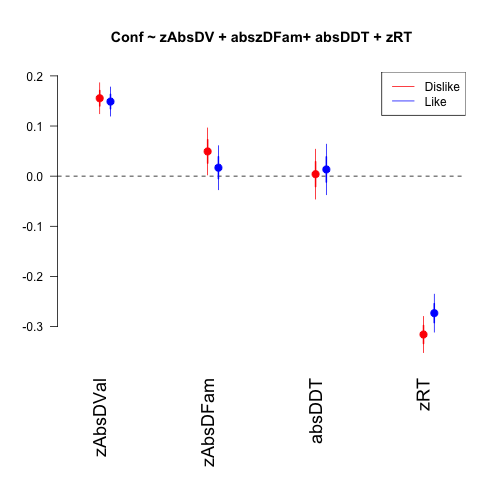

In [90]:
%%R
#regression for confidence and familiarity
title_plot = ("Conf ~ zAbsDV + abszDFam+ absDDT + zRT")

ModelConfidenceL_M3 <- glm(zConf ~ zAbsDVal + zAbsDFam+ absDDT + zRT , data=data_exp1_Like)
ModelConfidenceD_M3 <- glm(zConf ~ zAbsDVal  +zAbsDFam+ absDDT + zRT , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_M3)
BIC2 = BIC(ModelConfidenceD_M3)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceD_M3,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_M3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

# Appendix
_____________________________________________________________________________________________________________________

<a id='ImpPkg'></a>
# 1. Import Packages

In [2]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
import rpy2


%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice

# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


TypeError: consoleWarn() missing 1 required positional argument: 'x'

/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: Setting LC_COLLATE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 3: Setting LC_MESSAGES failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 4: Setting LC_MONETARY failed, using "C" 

  warnings.warn(x, RRuntimeWarning)


In [4]:
%%R
# Use in case the libraries are not available in the system
#install.packages("lme4")
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


In [5]:
%%R
library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(pbkrtest)
library(broom)
library(dplyr)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)

<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [6]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

### Split variable into participantwise quantiles

In [7]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [8]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=2, prop={'size':20})
    sns.despine()

### Full simple logistic graph (no bins)

In [9]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=2, prop={'size':20})
    sns.despine()

### Regression Coefficients Plot

In [10]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [11]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()

In [12]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas